In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
plt.style.use('ggplot')
plt.style.use('seaborn-bright')

### Demographics Inofmation

## Product Details - Categories, Play types

In [3]:
product_cat_df = pd.read_excel("data/new/Product_details_from_BSS.xls")  

In [4]:
product_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60708 entries, 0 to 60707
Data columns (total 17 columns):
PRODUCT_LABEL.hash    60708 non-null object
CUSTOMER_REF.hash     60708 non-null object
ACCOUNT_NUM.hash      60708 non-null object
PRODUCT_SEQ           60708 non-null int64
START_DAT             60707 non-null datetime64[ns]
END_DAT               3292 non-null datetime64[ns]
PRODUCT_ID.hash       60708 non-null object
PRODUCT_NAME          60707 non-null object
PRODUCT_STATUS        60707 non-null object
MEDIUM                60684 non-null object
CATEGORY              60273 non-null object
CATEGORY_DETAILS      60273 non-null object
TARIFF_ID.hash        60708 non-null object
TARIFF_NAME           60707 non-null object
TARIFF_DESC           60707 non-null object
RECURRING_CHARGE      8386 non-null float64
                      60708 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(13)
memory usage: 7.9+ MB


In [5]:
product_cat_df["PRODUCT_NAME"].value_counts()

V_SLT Voice Service            18847
AB_Copper Access Bearer        17637
BB_SLT BroadBand Service        5400
BB_Extra GB                     5372
BB_PeoTVGO                      4800
BB_Personal Storage             4368
E_SLT PeoTV Service             2385
AB_WireLess Access              1076
AB_Fiber Access Bearer           327
V-Basic1_TeleLife                 99
V-Plus1_TeleLife                  87
BB_Detailed Reports               84
V_E-channeling Registration       80
V_Telehealth                      58
V_Sisu Connect                    36
V_E-channeling Subscription       30
BB_SLT Film Hall Service           9
OTT_SLT PeoTV Go                   4
V-Plus4_TeleLife                   3
BB_ Entertainment Unlimited        2
V-Basic2_TeleLife                  2
V-Basic4_TeleLife                  1
Name: PRODUCT_NAME, dtype: int64

In [6]:
products_df = product_cat_df[["PRODUCT_ID.hash","PRODUCT_NAME","MEDIUM","CATEGORY","CATEGORY_DETAILS","TARIFF_ID.hash","TARIFF_NAME","TARIFF_DESC","RECURRING_CHARGE"]]

In [7]:
products_df.drop_duplicates(["PRODUCT_ID.hash"],inplace=True, keep="last")

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
products_df.rename(columns = {"RECURRING_CHARGE":"Monthly_Rental"},inplace=True)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [9]:
products_df.reset_index(inplace=True)
products_df.drop(["index"],axis=1,inplace=True)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
PRODUCT_ID.hash     23 non-null object
PRODUCT_NAME        22 non-null object
MEDIUM              19 non-null object
CATEGORY            17 non-null object
CATEGORY_DETAILS    17 non-null object
TARIFF_ID.hash      23 non-null object
TARIFF_NAME         22 non-null object
TARIFF_DESC         22 non-null object
Monthly_Rental      10 non-null float64
dtypes: float64(1), object(8)
memory usage: 1.7+ KB


In [11]:
products_df["PRODUCT_NAME"].unique()

array([nan, 'V-Plus4_TeleLife', 'V_E-channeling Subscription',
       'V-Basic2_TeleLife', 'V-Basic4_TeleLife', 'V-Basic1_TeleLife',
       'V_Sisu Connect', 'V_Telehealth', 'V-Plus1_TeleLife',
       'V_E-channeling Registration', 'BB_ Entertainment Unlimited',
       'OTT_SLT PeoTV Go', 'AB_WireLess Access',
       'BB_SLT Film Hall Service', 'BB_Detailed Reports ',
       'AB_Fiber Access Bearer', 'BB_PeoTVGO', 'BB_Extra GB',
       'BB_SLT BroadBand Service', 'BB_Personal Storage',
       'E_SLT PeoTV Service', 'V_SLT Voice Service',
       'AB_Copper Access Bearer'], dtype=object)

In [12]:
products_df.to_csv("data/product_catalog/Product_info_from_BSS.csv")

## Phone No Account No Customer Reference Map

In [13]:
acc_no_map = product_cat_df[["PRODUCT_LABEL.hash","ACCOUNT_NUM.hash","CUSTOMER_REF.hash"]]
acc_no_map.drop_duplicates(["PRODUCT_LABEL.hash"],inplace=True)
acc_no_map.rename(columns={'PRODUCT_LABEL.hash':'event_source.hash'}, inplace=True)
acc_no_map.reset_index(inplace=True)
acc_no_map.drop(["index"],axis=1,inplace=True)
acc_no_map

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash
0,7b40c1d1c84c9a340004769491af7931,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f
1,15799aa2e9dcf19b945e3dbe3146f7dc,4c7a4769273c7a2eb4860a09f6376a70,b30293458c6565bc283bac15b92aa38d
2,a74c72a07e26ac631688df66f691255c,4c7a4769273c7a2eb4860a09f6376a70,b30293458c6565bc283bac15b92aa38d
3,d67702262368f632f7014f1bd12d5444,4c7a4769273c7a2eb4860a09f6376a70,b30293458c6565bc283bac15b92aa38d
4,53098ea32fbe12338600872be6e06fb0,4c7a4769273c7a2eb4860a09f6376a70,b30293458c6565bc283bac15b92aa38d
...,...,...,...
27550,28938db617a935e0f092ae16667c9f37,06623c7ba64331f615ff83c5664b71bb,ac995f79a7164b89de084396352b343b
27551,d7515b0ed8141e075023da5947b714bf,06623c7ba64331f615ff83c5664b71bb,ac995f79a7164b89de084396352b343b
27552,919ba5f18ce708afcd4f545150021b0e,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f
27553,7ae240b62cca05b9ab0af678122e7e5c,8d8472d39b270801553f2d5e7c06fe22,f8743da5d0bff84f9440fb44fce1bdc1


In [22]:
acc_no_map_agg = acc_no_map.groupby("ACCOUNT_NUM.hash").agg(list)

In [21]:
acc_no_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 3 columns):
event_source.hash    27555 non-null object
ACCOUNT_NUM.hash     27555 non-null object
CUSTOMER_REF.hash    27555 non-null object
dtypes: object(3)
memory usage: 645.9+ KB


In [26]:
acc_no_map_agg.reset_index(inplace=True)

In [17]:
len(acc_no_map["ACCOUNT_NUM.hash"].unique())

3218

In [28]:
acc_no_map.to_csv("data/user_profile/account_no_map_all.csv")

In [27]:
acc_no_map_agg.to_csv("data/user_profile/account_no_map_agg.csv")

## Adding Phone Number col to Customer Demographics 

In [29]:
demo_df = pd.read_excel("data/new/Demographic_Data.xls")  

In [30]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 5 columns):
CUSTOMER_REF.hash    2400 non-null object
GENDER               2400 non-null object
BIRTH_YEAR           2400 non-null int64
AGE                  2400 non-null int64
                     2400 non-null object
dtypes: int64(2), object(3)
memory usage: 93.9+ KB


In [31]:
merged_demo = demo_df.merge(acc_no_map,how='left', on='CUSTOMER_REF.hash')
merged_demo.reset_index(inplace=True)
merged_demo.drop(["index"],axis=1, inplace=True)
merged_demo

,CUSTOMER_REF.hash,GENDER,BIRTH_YEAR,AGE,,event_source.hash,ACCOUNT_NUM.hash
0,a043dbaaa0025b1f8cc08824dc994a0d,M,1967,54,,a84f463df0fb45ec8d42ca92ab237156,a9c24ac1c87f8677a4dbe304c88054aa
1,a043dbaaa0025b1f8cc08824dc994a0d,M,1967,54,,174913a52c17beb0dad243cec5940c30,a9c24ac1c87f8677a4dbe304c88054aa
2,2e5e5c967af4b7b4c0cf0b9185d5ad7e,M,1964,57,,0bd313cd37f37a651cc0bda8feadc630,ee3713acf4da68cda726f61d3f1026f7
3,2e5e5c967af4b7b4c0cf0b9185d5ad7e,M,1964,57,,5b6deac8be1e07aabeb41a4158a08e71,ee3713acf4da68cda726f61d3f1026f7
4,3269bc892961919e511bdbe178fa0ac6,M,1966,55,,de4a1fdf1880db54d5176095a99ed2ab,6876df747de66cfb33ecd010dfcd68c7
...,...,...,...,...,...,...,...
4114,205b0fead79db9bf08a98002d2727ef5,M,1967,54,,8187113efb884778725f953c751ae4f1,87cd775edc9cfc4f401e6ff39f239833
4115,cd035ec55e44eea43d998addc7bcc434,M,1948,73,,90feabe2f2846cbf4eb77db650c48a1b,9c926ad1c6705e1f46462dc5b59d8feb
4116,f5fbbc6264cd75823c8f8cb0830cba45,F,1949,72,,7e2f7cef44ccac863691ec25019df475,ffaaa3f5d45ce8c8553efbcfa7e6ce00
4117,f5fbbc6264cd75823c8f8cb0830cba45,F,1949,72,,2324aebced3f63304a107e6e13c39f78,ffaaa3f5d45ce8c8553efbcfa7e6ce00


In [32]:
merged_demo = merged_demo[["event_source.hash","CUSTOMER_REF.hash","ACCOUNT_NUM.hash","GENDER","BIRTH_YEAR","AGE"]]

In [33]:
merged_demo.drop_duplicates("ACCOUNT_NUM.hash",  inplace=True, keep="last")

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
merged_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2439 entries, 1 to 4118
Data columns (total 6 columns):
event_source.hash    2438 non-null object
CUSTOMER_REF.hash    2439 non-null object
ACCOUNT_NUM.hash     2438 non-null object
GENDER               2439 non-null object
BIRTH_YEAR           2439 non-null int64
AGE                  2439 non-null int64
dtypes: int64(2), object(4)
memory usage: 133.4+ KB


In [35]:
merged_demo.to_csv("data/user_profile/user_demographics_final.csv")

## VAS Common Dataset Analysis

In [46]:
vas_common_df = pd.read_excel("data/new/VAS_Products_Purchased Dates_Rental.xls")
vas_common_df.rename(columns={'PRODUCT_NAME':'VAS','BSS_DSP':'Month_Subscribed','RENTAL':'Rental'}, inplace=True)

In [47]:
# Date correction
def date_correct_common(date):
    date=str(date)
    year=date[:4]
    month=date[5:7]
    return f"{year}-{month}"

In [48]:
vas_common_df["Month_Subscribed"]=vas_common_df["Month_Subscribed"].apply(lambda x: date_correct_common(x))

In [50]:
vas_common_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31548 entries, 0 to 31547
Data columns (total 5 columns):
ACCOUNT_NUM.hash    31548 non-null object
VAS                 31548 non-null object
Rental              31548 non-null object
Month_Subscribed    31548 non-null object
                    31548 non-null object
dtypes: object(5)
memory usage: 1.2+ MB


In [40]:
#vas_common_df = vas_common_df.merge(acc_no_map_agg,how='left',on="ACCOUNT_NUM.hash")

In [51]:
vas_common_df = vas_common_df[["ACCOUNT_NUM.hash","VAS","Month_Subscribed","Rental"]]
vas_common_df

,ACCOUNT_NUM.hash,VAS,Month_Subscribed,Rental
0,e112d7496d586689517a4e45b5f2fedf,V_Telehealth,2019-10,100
1,8211688ed551c3ae41cd251ec79a7590,V_Telehealth,2019-10,100
2,0febcc112d2da8fb15ae29af3e6b07e8,V_Telehealth,2020-02,100
3,646a136484b965c0b4a1b18dfbb2c663,V_Telehealth,2020-02,100
4,49e3fe21450d5993d23121d53942ab3b,V_Telehealth,2020-02,100
...,...,...,...,...
31543,cf8dc52e654c98c2461291893eb27c06,V_Telehealth,2020-08,100
31544,720d67e1d56b076413efbd52553c5388,V_Telehealth,2020-08,165
31545,8e7a582787f663d030bd2dc31e46ee49,FTTH_Gamer Lite Subscription,2021-04,500
31546,8e7a582787f663d030bd2dc31e46ee49,FTTH_Gamer Lite Subscription,2021-04,500


In [52]:
vas_common_df["VAS"].value_counts()

V_Telehealth                        30569
P-Basic1_Tele Life                    266
P-Plus1_Tele Life                     149
V-Basic1_TeleLife                     135
V-Plus1_TeleLife                      113
P_Sisu Connect                        107
V_Sisu Connect                         74
BB_YouTube Bundle                      59
BB_Messenger Bundle                    28
BB_ Entertainment Unlimited            22
P-Plus4_Tele Life                       5
V-Plus4_TeleLife                        4
C_Sisu Connect                          4
P-Basic2_Tele Life                      3
V-Basic2_TeleLife                       2
C-Basic1_Tele Life                      2
FTTH_Gamer Lite Subscription            2
Megaline_Gamer Lite Subscription        1
V-Basic4_TeleLife                       1
P-Basic4_Tele Life                      1
2462                                    1
Name: VAS, dtype: int64

## VAS Analysis from Product BSS dataset

In [53]:
product_cat_df["PRODUCT_NAME"].unique()

array(['AB_Copper Access Bearer', 'V_SLT Voice Service',
       'E_SLT PeoTV Service', 'V_E-channeling Registration',
       'V_Sisu Connect', 'V-Basic1_TeleLife', 'V_Telehealth',
       'V-Plus1_TeleLife', 'V_E-channeling Subscription', nan,
       'V-Plus4_TeleLife', 'OTT_SLT PeoTV Go', 'V-Basic2_TeleLife',
       'V-Basic4_TeleLife', 'BB_PeoTVGO', 'BB_Personal Storage',
       'BB_SLT BroadBand Service', 'BB_Extra GB', 'BB_Detailed Reports ',
       'BB_ Entertainment Unlimited', 'BB_SLT Film Hall Service',
       'AB_Fiber Access Bearer', 'AB_WireLess Access'], dtype=object)

In [54]:
dss_vas_df =  product_cat_df[["PRODUCT_LABEL.hash","CUSTOMER_REF.hash","ACCOUNT_NUM.hash","PRODUCT_NAME","START_DAT","RECURRING_CHARGE"]]

In [55]:
dss_vas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60708 entries, 0 to 60707
Data columns (total 6 columns):
PRODUCT_LABEL.hash    60708 non-null object
CUSTOMER_REF.hash     60708 non-null object
ACCOUNT_NUM.hash      60708 non-null object
PRODUCT_NAME          60707 non-null object
START_DAT             60707 non-null datetime64[ns]
RECURRING_CHARGE      8386 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.8+ MB


In [56]:
dss_vas_df.sort_values(['PRODUCT_LABEL.hash', 'START_DAT'], ascending=[True, True], inplace=True)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
dss_vas_df.rename(columns={'PRODUCT_LABEL.hash':'event_source.hash','PRODUCT_NAME':'VAS','START_DAT':'Month_Subscribed',"RECURRING_CHARGE":"Rental"}, inplace=True)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


### Exporting Extra GB usage

In [58]:
extra_GB_dss_df = dss_vas_df[(dss_vas_df["VAS"]=="BB_Extra GB")]

In [59]:
extra_GB_dss_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 50834 to 39372
Data columns (total 6 columns):
event_source.hash    5372 non-null object
CUSTOMER_REF.hash    5372 non-null object
ACCOUNT_NUM.hash     5372 non-null object
VAS                  5372 non-null object
Month_Subscribed     5372 non-null datetime64[ns]
Rental               0 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 293.8+ KB


In [60]:
extra_GB_dss_df["VAS"].value_counts()

BB_Extra GB    5372
Name: VAS, dtype: int64

In [61]:
extra_GB_dss_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 50834 to 39372
Data columns (total 6 columns):
event_source.hash    5372 non-null object
CUSTOMER_REF.hash    5372 non-null object
ACCOUNT_NUM.hash     5372 non-null object
VAS                  5372 non-null object
Month_Subscribed     5372 non-null datetime64[ns]
Rental               0 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 293.8+ KB


In [62]:
len(extra_GB_dss_df["ACCOUNT_NUM.hash"].unique())

1469

In [63]:
dss_vas_df = dss_vas_df[(dss_vas_df["VAS"]!="BB_Extra GB")]

In [42]:
#dss_vas_df.drop_duplicates(["event_source.hash"],inplace=True,keep="last")

In [64]:
# Date correction
def date_correct_dss(date):
    if len(date)>7:
        return date[:7]
    else:
        return date

In [65]:
dss_vas_df["Month_Subscribed"]=dss_vas_df["Month_Subscribed"].apply(lambda x: date_correct_dss(str(x)))

In [66]:
dss_vas_df["Month_Subscribed"].unique()

array(['2018-08', '2020-05', '2018-11', '2019-01', '2018-09', '2018-12',
       '2019-07', '2018-07', '2019-10', '2020-03', '2020-01', '2016-10',
       '2019-04', '2017-11', '2019-02', '2020-08', '2018-04', '2019-03',
       '2018-01', '2019-11', '2017-08', '2019-09', '2019-05', '2018-10',
       '2020-07', '2019-08', '2018-02', '2020-06', '2018-03', '2017-01',
       '2019-12', '2017-04', '2020-02', '2019-06', '2021-02', '2020-04',
       '2017-03', '2017-07', '2014-02', '2018-05', '2017-12', '2020-09',
       '2016-11', '2016-09', '2017-06', '2016-05', '2018-06', '2017-02',
       '2015-10', '2017-05', '2017-09', '2016-06', '2016-04', '2015-08',
       '2014-03', '2015-05', '2017-10', '2016-03', '2015-11', '2021-03',
       '2015-09', '2016-07', '2015-07', '2014-01', '2016-08', '2016-01',
       'NaT', '2015-02', '2020-10', '2016-12', '2016-02'], dtype=object)

In [67]:
dss_vas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55336 entries, 10559 to 26738
Data columns (total 6 columns):
event_source.hash    55336 non-null object
CUSTOMER_REF.hash    55336 non-null object
ACCOUNT_NUM.hash     55336 non-null object
VAS                  55335 non-null object
Month_Subscribed     55336 non-null object
Rental               8386 non-null float64
dtypes: float64(1), object(5)
memory usage: 3.0+ MB


In [68]:
dss_vas_df["VAS"].value_counts()

V_SLT Voice Service            18847
AB_Copper Access Bearer        17637
BB_SLT BroadBand Service        5400
BB_PeoTVGO                      4800
BB_Personal Storage             4368
E_SLT PeoTV Service             2385
AB_WireLess Access              1076
AB_Fiber Access Bearer           327
V-Basic1_TeleLife                 99
V-Plus1_TeleLife                  87
BB_Detailed Reports               84
V_E-channeling Registration       80
V_Telehealth                      58
V_Sisu Connect                    36
V_E-channeling Subscription       30
BB_SLT Film Hall Service           9
OTT_SLT PeoTV Go                   4
V-Plus4_TeleLife                   3
V-Basic2_TeleLife                  2
BB_ Entertainment Unlimited        2
V-Basic4_TeleLife                  1
Name: VAS, dtype: int64

## VAS OTC Dataset Analysis

In [69]:
vas_otc_df = pd.read_excel("data/new/VAS_Products_Purchased Dates_OTC.xls")  
vas_otc_df.rename(columns={'CREATED_DTM':'Month_Subscribed','OTC_MNY':'One_Time_Charge','OTC_NAME':'VAS'}, inplace=True)

In [70]:
vas_otc_df["Month_Subscribed"]=vas_otc_df["Month_Subscribed"].apply(lambda x: date_correct_common(x))

In [71]:
vas_otc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 5 columns):
ACCOUNT_NUM.hash    1547 non-null object
Month_Subscribed    1547 non-null object
One_Time_Charge     1547 non-null int64
VAS                 1547 non-null object
                    1547 non-null object
dtypes: int64(1), object(4)
memory usage: 60.6+ KB


In [61]:
#vas_otc_df = vas_otc_df.merge(acc_no_map,how='left',on="ACCOUNT_NUM.hash")

In [72]:
vas_otc_df = vas_otc_df[["ACCOUNT_NUM.hash","VAS","Month_Subscribed","One_Time_Charge"]]
vas_otc_df

,ACCOUNT_NUM.hash,VAS,Month_Subscribed,One_Time_Charge
0,7a4e5798abc9c9e314e4c6367da7e558,Meet Lite,2021-05,195
1,02059e815d999bda708149ae263946d3,Meet Lite,2021-06,195
2,83b2f83faba76ed481f026be3197caaa,Meet Lite,2021-06,195
3,a3434e3a611ba69b233514072ad2eb79,Meet Lite,2021-04,195
4,a3434e3a611ba69b233514072ad2eb79,Meet Lite,2021-05,195
...,...,...,...,...
1542,5ac9d5e02406067f6cc31d5436a5a8fb,Meet Lite,2021-04,195
1543,4f1ed566c9476815cfe56eab1c22ed05,Meet Lite,2021-06,195
1544,4cf83d8277f8c1cd95199a342092e808,Meet Max,2020-10,490
1545,4cf83d8277f8c1cd95199a342092e808,Meet Max,2020-12,490


In [73]:
vas_otc_df["VAS"].value_counts()

Meet Lite    1374
Meet Max      164
Edu Lite        9
Name: VAS, dtype: int64

## BB VAS Dataset Analysis

In [74]:
vas_purchase_df = pd.read_excel("data/new/VAS_Products_Purchased Dates_Costed_Events.xls")  
vas_purchase_df.rename(columns={'MM/YYYY':'Month_Subscribed','REV':'Rental','PRODUCT':'VAS'}, inplace=True)

In [75]:
vas_purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2977 entries, 0 to 2976
Data columns (total 5 columns):
ACCOUNT_NUM.hash    2977 non-null object
Month_Subscribed    2977 non-null object
Rental              2977 non-null float64
VAS                 2977 non-null object
                    2977 non-null object
dtypes: float64(1), object(4)
memory usage: 116.4+ KB


In [76]:
# Date correction
def date_correct_bb(date):
    if len(date)==5:
        month = "0" + date[0]
        year = date[1:]
    if len(date)==6:
        month=date[:2]
        year=date[2:]
    if len(date)>6:
        year=date[:4]
        month=date[9:11]
    return f"{year}-{month}"

In [77]:
# test
print(date_correct_bb("32020"))
print(date_correct_bb("102017"))
print(date_correct_bb("2021-May-02 08:02:23"))

2020-03
2017-10
2021-02


In [78]:
vas_purchase_df["Month_Subscribed"]=vas_purchase_df["Month_Subscribed"].apply(lambda x: date_correct_bb(x))

In [59]:
#vas_purchase_df = vas_purchase_df.merge(acc_no_map,how='left',on="ACCOUNT_NUM.hash")
#vas_purchase_df.drop_duplicates(["ACCOUNT_NUM.hash","VAS","Month_Subscribed"], inplace=True,keep="last")

In [79]:
vas_purchase_df = vas_purchase_df[["ACCOUNT_NUM.hash","VAS","Month_Subscribed","Rental"]]

In [80]:
vas_purchase_df["VAS"].value_counts()

BB EXTRA GB                      2307
BB_Report Subscription Charge     494
BB Personal Storage               176
Name: VAS, dtype: int64

### Extra GB Usage

In [81]:
extra_GB_df= vas_purchase_df[(vas_purchase_df["VAS"]=="BB EXTRA GB")]
extra_GB_df.reset_index(inplace=True)
extra_GB_df.drop(["index"],axis=1,inplace=True)
extra_GB_df

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ACCOUNT_NUM.hash,VAS,Month_Subscribed,Rental
0,668291ed17c638aaed94f99f7fdf33a5,BB EXTRA GB,2017-04,250.0
1,59322724d5029e5667d19ae164cdc16d,BB EXTRA GB,2018-01,750.0
2,0e1fe0d01f3a2e9619999a1a634ec427,BB EXTRA GB,2018-01,1500.0
3,0e3e3cabb8b653645ad4268f318a80b8,BB EXTRA GB,2017-08,750.0
4,130a75d8233d72dc5dce070522818bea,BB EXTRA GB,2020-06,850.0
...,...,...,...,...
2302,9b711e39affb4e5a7a364787253d4c09,BB EXTRA GB,2020-05,3000.0
2303,83b2f83faba76ed481f026be3197caaa,BB EXTRA GB,2020-03,850.0
2304,6c4e0622eabb0cd72da7dee9ac9e1996,BB EXTRA GB,2020-05,3585.0
2305,6f5a50d14f88a8bbed200d30e65ddf20,BB EXTRA GB,2020-03,3400.0


In [82]:
extra_GB_dss_df= extra_GB_dss_df[["ACCOUNT_NUM.hash","VAS","Month_Subscribed","Rental"]]

In [86]:
# Date correction
def date_correct_dss(date):
    if len(date)>7:
        return date[:7]
    else:
        return date

In [87]:
extra_GB_dss_df["Month_Subscribed"]=extra_GB_dss_df["Month_Subscribed"].apply(lambda x: date_correct_dss(str(x)))

In [88]:
extra_GB_dss_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 50834 to 39372
Data columns (total 4 columns):
ACCOUNT_NUM.hash    5372 non-null object
VAS                 5372 non-null object
Month_Subscribed    5372 non-null object
Rental              0 non-null float64
dtypes: float64(1), object(3)
memory usage: 209.8+ KB


In [89]:
extra_GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307 entries, 0 to 2306
Data columns (total 4 columns):
ACCOUNT_NUM.hash    2307 non-null object
VAS                 2307 non-null object
Month_Subscribed    2307 non-null object
Rental              2307 non-null float64
dtypes: float64(1), object(3)
memory usage: 72.2+ KB


In [90]:
extra_GB_df = pd.concat([extra_GB_dss_df, extra_GB_df], ignore_index=True)

In [91]:
extra_GB_df["Month_Subscribed"].unique()

array(['2019-10', '2018-07', '2019-07', '2017-11', '2019-04', '2018-12',
       '2018-09', '2018-08', '2020-01', '2017-01', '2019-05', '2019-11',
       '2017-08', '2019-03', '2020-06', '2020-02', '2019-12', '2020-03',
       '2017-07', '2018-01', '2017-12', '2020-07', '2019-01', '2019-02',
       '2019-06', '2017-06', '2018-04', '2016-10', '2020-08', '2020-04',
       '2019-09', '2018-10', '2015-10', '2016-11', '2016-06', '2018-06',
       '2019-08', '2016-04', '2018-11', '2020-05', '2020-09', '2018-02',
       '2017-02', '2018-05', '2017-04', '2017-03', '2015-09', '2017-10',
       '2018-03', '2014-03', '2014-01', '2016-07', '2016-09', '2016-03',
       '2016-05', '2014-02', '2016-08', '2017-05', '2015-08', '2015-05',
       '2017-09', '2016-01', '2021-03', '2016-12', '2013-05', '2013-06',
       '2013-01', '2013-03', '2013-07', '2013-02', '2015-12', '2013-04',
       '2016-02', '2015-11'], dtype=object)

In [93]:
extra_GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 4 columns):
ACCOUNT_NUM.hash    7679 non-null object
VAS                 7679 non-null object
Month_Subscribed    7679 non-null object
Rental              2307 non-null float64
dtypes: float64(1), object(3)
memory usage: 240.1+ KB


In [92]:
len(extra_GB_df["ACCOUNT_NUM.hash"].unique())

1527

### Extra GB Usage Trend Analysis

In [94]:
bb_usage_for_plot = extra_GB_df[["ACCOUNT_NUM.hash","Month_Subscribed","Rental"]]
bb_usage_for_plot["Month_Subscribed"] = bb_usage_for_plot["Month_Subscribed"].astype("category")

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
bb_summed_df = bb_usage_for_plot.groupby("Month_Subscribed").sum()

In [97]:
bb_summed_df

,Rental
Month_Subscribed,
2013-01,18750.0
2013-02,6750.0
2013-03,5000.0
2013-04,4000.0
2013-05,13500.0
...,...
2020-06,250400.0
2020-07,300420.0
2020-08,0.0


In [98]:
df_2016 = bb_summed_df.iloc[16:28,:]

In [99]:
df_2017 = bb_summed_df.iloc[28:40,:]

In [100]:
df_2018 = bb_summed_df.iloc[40:52,:]

In [101]:
df_2019 = bb_summed_df.iloc[52:64,:]

In [102]:
df_2020 = bb_summed_df.iloc[64:73,:]

Text(0.5, 0.98, 'Extra Gb Usage(Rs.) with Time')

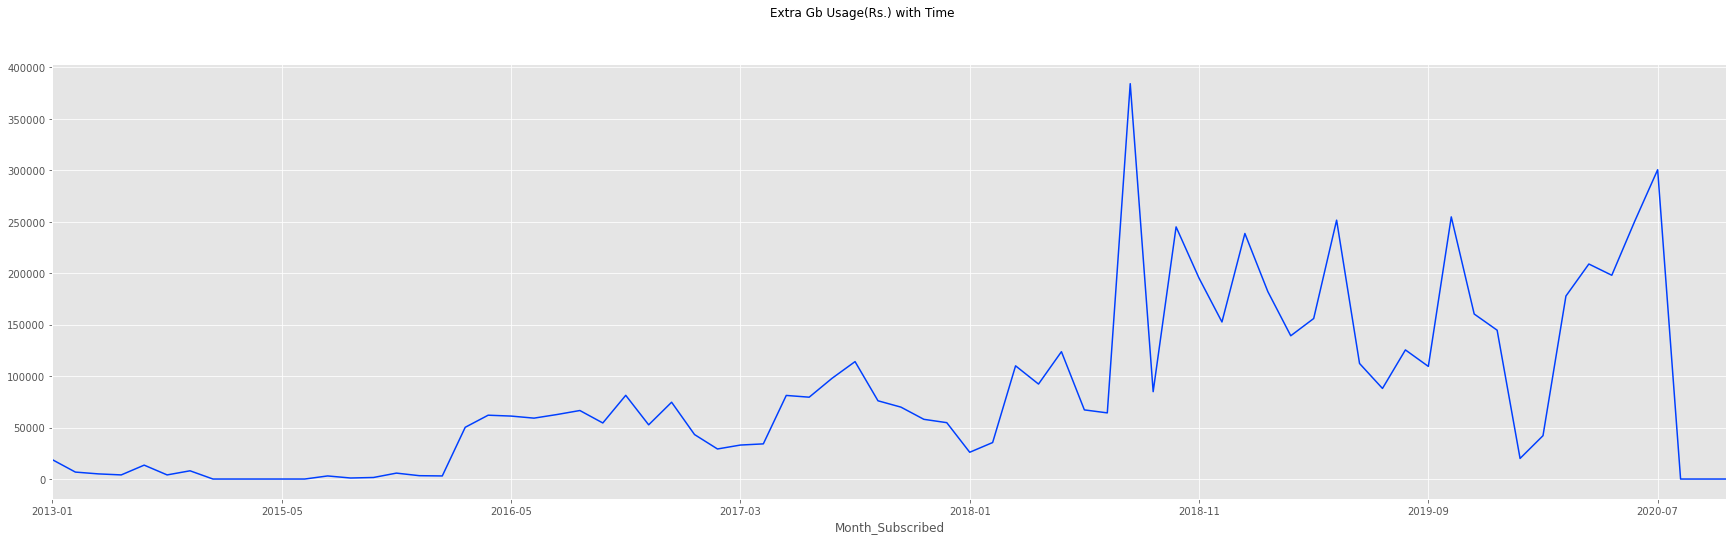

In [103]:
plt.figure(figsize=(30,8))
bb_summed_df["Rental"].plot()
plt.suptitle("Extra Gb Usage(Rs.) with Time")

Text(0.5, 1.0, 'Extra Gb Usage(Rs.) with Time')

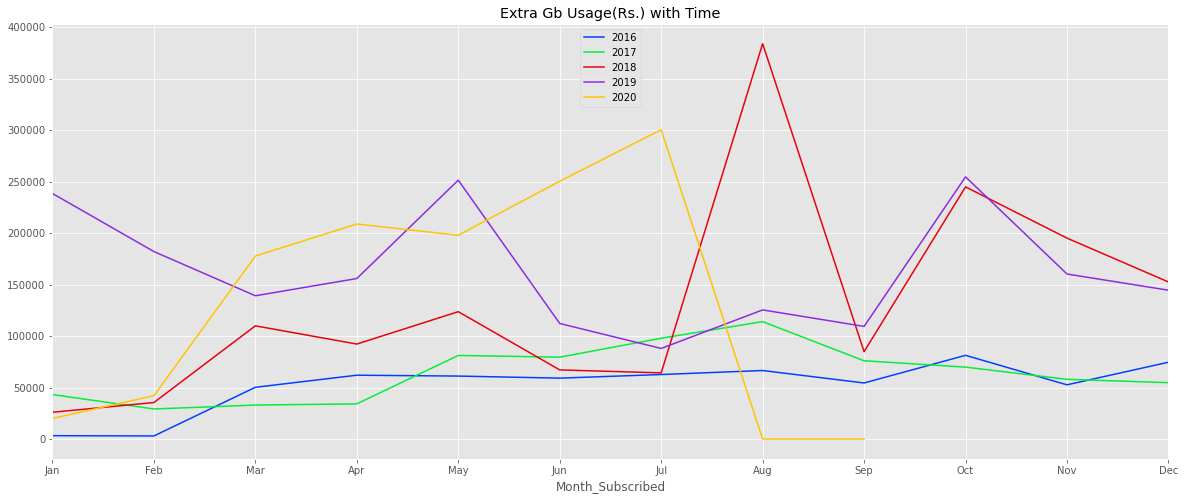

<Figure size 432x288 with 0 Axes>

In [104]:
fig, ax = plt.subplots()
plt.figure()
df_2016["Rental"].plot(ax=ax,figsize=(20,8))
df_2017["Rental"].plot(ax=ax,figsize=(20,8))
df_2018["Rental"].plot(ax=ax,figsize=(20,8))
df_2019["Rental"].plot(ax=ax,figsize=(20,8))
df_2020["Rental"].plot(ax=ax,figsize=(20,8))
ax.legend(["2016","2017","2018","2019","2020"], loc='upper center')
month_ticks=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
ax.set_xticks(np.arange(len(month_ticks)))
ax.set_xticklabels(month_ticks)
ax.set_title("Extra Gb Usage(Rs.) with Time")

In [105]:
extra_GB_df.to_csv("data/user_profile/BB_extra_GB_usage.csv")

#### Extra GB Usage pivot matrix

In [106]:
extra_GB_pivot_df = pd.pivot_table(extra_GB_df[["ACCOUNT_NUM.hash","Month_Subscribed","Rental"]],index=['ACCOUNT_NUM.hash'],columns=['Month_Subscribed'], aggfunc=np.sum, fill_value=0)

In [107]:
extra_GB_pivot_df

Rental                                  \
Month_Subscribed                 2013-01 2013-02 2013-03 2013-04 2013-05   
ACCOUNT_NUM.hash                                                           
0009e7e4d940c2a539b89342af07e7f1       0       0       0       0       0   
00126426420cdb4b1fe951ce5bb3c05a     500       0     250       0       0   
008bca99f0cccb5d07d4f03744709cf8       0       0       0       0       0   
009ef2d25878cecee8d2c8115d26f4ab       0       0       0       0       0   
0105eba65de307bc8ca366dac37aff7b       0       0       0       0       0   
...                                  ...     ...     ...     ...     ...   
ff419294738cd6d4259861c10653cf17       0       0       0       0       0   
ff464b58ad70d2a6064acb0c2c727337       0       0       0       0       0   
ff6a9ebde4f19c42c852aa679c877b41       0       0       0       0       0   
ffaa8955dcd8a0af7d148c10fd447fcc       0       0       0       0       0   
ffc751bb5812fb7f262917605876f78a       0       0       0       0       0   

                                                                          ...  \
Month_Subscribed                 2013-06 2013-07 2014-01 2014-02 2014-03  ...   
ACCOUNT_NUM.hash                                                          ...   
0009e7e4d940c2a539b89342af07e7f1       0       0       0       0       0  ...   
00126426420cdb4b1fe951ce5bb3c05a       0       0       0       0       0  ...   
008bca99f0cccb5d07d4f03744709cf8       0       0       0       0       0  ...   
009ef2d25878cecee8d2c8115d26f4ab       0       0       0       0       0  ...   
0105eba65de307bc8ca366dac37aff7b       0       0       0       0       0  ...   
...                                  ...     ...     ...     ...     ...  ...   
ff419294738cd6d4259861c10653cf17       0       0       0       0       0  ...   
ff464b58ad70d2a6064acb0c2c727337       0       0       0       0       0  ...   
ff6a9ebde4f19c42c852aa679c877b41       0       0       0       0       0  ...   
ffaa8955dcd8a0af7d148c10fd447fcc       0       0       0       0       0  ...   
ffc751bb5812fb7f262917605876f78a       0       0       0       0       0  ...   

                                                                          \
Month_Subscribed                 2020-01 2020-02 2020-03 2020-04 2020-05   
ACCOUNT_NUM.hash                                                           
0009e7e4d940c2a539b89342af07e7f1       0       0    1200       0       0   
00126426420cdb4b1fe951ce5bb3c05a       0       0       0       0       0   
008bca99f0cccb5d07d4f03744709cf8       0       0       0       0       0   
009ef2d25878cecee8d2c8115d26f4ab       0       0       0       0       0   
0105eba65de307bc8ca366dac37aff7b       0       0       0       0       0   
...                                  ...     ...     ...     ...     ...   
ff419294738cd6d4259861c10653cf17       0       0       0       0       0   
ff464b58ad70d2a6064acb0c2c727337       0       0       0       0       0   
ff6a9ebde4f19c42c852aa679c877b41       0       0       0    1050    1050   
ffaa8955dcd8a0af7d148c10fd447fcc       0       0       0       0       0   
ffc751bb5812fb7f262917605876f78a       0       0       0       0       0   

                                                                          
Month_Subscribed                 2020-06 2020-07 2020-08 2020-09 2021-03  
ACCOUNT_NUM.hash                                                          
0009e7e4d940c2a539b89342af07e7f1       0       0       0       0       0  
00126426420cdb4b1fe951ce5bb3c05a       0       0       0       0       0  
008bca99f0cccb5d07d4f03744709cf8       0       0       0       0       0  
009ef2d25878cecee8d2c8115d26f4ab       0       0       0       0       0  
0105eba65de307bc8ca366dac37aff7b       0       0       0       0       0  
...                                  ...     ...     ...     ...     ...  
ff419294738cd6d4259861c10653cf17       0       0       0       0       0  
ff464b58ad70d2a6064

In [108]:
extra_GB_pivot_df.to_csv("data/user_profile/BB_extra_GB_usage_pivot_extended.csv")

#### Insights
- 21634Unique customers - extra GB purchases in moths vary from 2013-2021

### Other BB VAS

In [109]:
bb_vas_df= vas_purchase_df[(vas_purchase_df["VAS"]!="BB EXTRA GB")]
bb_vas_df.reset_index(inplace=True)
bb_vas_df.drop(["index"],axis=1,inplace=True)
bb_vas_df

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ACCOUNT_NUM.hash,VAS,Month_Subscribed,Rental
0,949e14e85d36002ffb954d42d3366936,BB_Report Subscription Charge,2021-02,40.0
1,949e14e85d36002ffb954d42d3366936,BB_Report Subscription Charge,2021-03,40.0
2,b027d65390a0c725b9ce41e409f9797e,BB_Report Subscription Charge,2021-03,40.0
3,b027d65390a0c725b9ce41e409f9797e,BB_Report Subscription Charge,2021-02,40.0
4,b027d65390a0c725b9ce41e409f9797e,BB_Report Subscription Charge,2021-03,40.0
...,...,...,...,...
665,8d8472d39b270801553f2d5e7c06fe22,BB_Report Subscription Charge,2021-02,40.0
666,8d8472d39b270801553f2d5e7c06fe22,BB_Report Subscription Charge,2021-02,40.0
667,8d8472d39b270801553f2d5e7c06fe22,BB_Report Subscription Charge,2021-03,40.0
668,8d8472d39b270801553f2d5e7c06fe22,BB_Report Subscription Charge,2021-03,40.0


## VAS DWH Dataset Analysis

In [110]:
vas_DWH_df = pd.read_excel("data/new/VAS_Products_Purchased Dates_SLT_DWH.xls")  
vas_DWH_df.rename(columns={'ACCOUNT_NO.hash':'ACCOUNT_NUM.hash','REPORTING_MONTH_CAL_MONTH_CODE':'Month_Subscribed','CODE_DESC':'VAS','REVENUE_AMOUNT':'Rental'}, inplace=True)

In [111]:
# Date correction
def date_correct_dwh(date):
    date=str(date)
    year=date[:4]
    month=date[4:7]
    return f"{year}-{month}"

In [112]:
vas_DWH_df["Month_Subscribed"]=vas_DWH_df["Month_Subscribed"].apply(lambda x: date_correct_dwh(x))

In [113]:
vas_DWH_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 5 columns):
ACCOUNT_NUM.hash    578 non-null object
Month_Subscribed    578 non-null object
VAS                 578 non-null object
Rental              578 non-null int64
                    578 non-null object
dtypes: int64(1), object(4)
memory usage: 22.7+ KB


In [88]:
#vas_DWH_df = vas_DWH_df.merge(acc_no_map,how='left',on="ACCOUNT_NUM.hash")
#vas_DWH_df.drop_duplicates(["ACCOUNT_NUM.hash","VAS"],inplace=True)
#vas_DWH_df.reset_index(inplace=True)
#vas_DWH_df.drop(["index"],axis=1,inplace=True)

In [115]:
vas_DWH_df = vas_DWH_df[["ACCOUNT_NUM.hash","VAS","Month_Subscribed","Rental"]]
vas_DWH_df

,ACCOUNT_NUM.hash,VAS,Month_Subscribed,Rental
0,204773567701102c4acf8fda9eaccfdd,PEO TV GO_OTT_A-la carte channels,2020-05,100
1,52e7c04d12cb33c77031760584a9586e,PEO TV GO_OTT_A-la carte channels,2020-06,100
2,9d2f5d0f09198069413924db9a10d1c3,PEO TV GO_OTT_A-la carte channels,2019-09,100
3,52b1c4fc5583a0b8449029dc92eeae45,PEO TV GO_OTT_A-la carte channels,2020-02,100
4,2b60f8ffb99f7932ee00cdd291fb1dd5,PEO TV GO_OTT_A-la carte channels,2020-07,100
...,...,...,...,...
573,9324793d25ea7ec770a033120d4d2254,Package Rental Through ADSL,2019-11,149
574,9324793d25ea7ec770a033120d4d2254,Package Rental Through ADSL,2020-08,149
575,9324793d25ea7ec770a033120d4d2254,Package Rental Through ADSL,2019-01,149
576,9324793d25ea7ec770a033120d4d2254,Package Rental Through ADSL,2019-10,149


In [116]:
vas_DWH_df["VAS"].value_counts()

PEO TV GO_OTT_A-la carte channels    475
Package Rental Through ADSL           73
PeoTVGo_Channel Package               23
BB_PeoTVGO Revenue code                7
Name: VAS, dtype: int64

## Product Sate Changes DF

In [117]:
state_changes_df = pd.read_csv("data/Product State Changes from BSS.csv")

In [118]:
state_changes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 13 columns):
PRODUCT_LABEL         3028 non-null int64
PRODUCT_LABEL.hash    3028 non-null object
CUSTOMER_REF          3028 non-null object
CUSTOMER_REF.hash     3028 non-null object
ACCOUNT_NUM           3028 non-null object
ACCOUNT_NUM.hash      3028 non-null object
PRODUCT_SEQ           3028 non-null int64
START_DAT             3028 non-null object
END_DAT               2653 non-null object
PRODUCT_ID            3028 non-null int64
PRODUCT_NAME          3028 non-null object
EFFECTIVE_DTM         3028 non-null object
PRODUCT_STATUS        3028 non-null object
dtypes: int64(3), object(10)
memory usage: 307.7+ KB


In [120]:
# Actual information for verification
actual_info_df = state_changes_df[['PRODUCT_LABEL','CUSTOMER_REF','ACCOUNT_NUM']]
actual_info_df.rename(columns={"PRODUCT_LABEL":"event_source"},inplace=True)
actual_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 3 columns):
event_source    3028 non-null int64
CUSTOMER_REF    3028 non-null object
ACCOUNT_NUM     3028 non-null object
dtypes: int64(1), object(2)
memory usage: 71.1+ KB


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [122]:
actual_info_df.to_csv("data/user_profile/Actual_Customer_Info.csv")

In [123]:
state_changes_df = state_changes_df.drop(['PRODUCT_LABEL','CUSTOMER_REF','ACCOUNT_NUM' ,'PRODUCT_STATUS','PRODUCT_ID','START_DAT','END_DAT','PRODUCT_SEQ'], axis=1)
state_changes_df.rename(columns={'PRODUCT_LABEL.hash': 'event_source.hash','PRODUCT_NAME':'VAS','EFFECTIVE_DTM':'Month_Subscribed'}, inplace=True)

In [124]:
month_map = {"Jan":"01","Feb":"02","Mar":"03","Apr":"04","May":"05","Jun":"06","Jul":"07","Aug":"08","Sep":"09","Oct":"10","Nov":"11","Dec":"12"}

In [125]:
# Date correction
def date_correct_psc(date):
    date=str(date)
    year=date[:4]
    mnt_temp= date[5:8]
    month=[v for k, v in month_map.items() if mnt_temp in k][0]
    return f"{year}-{month}"

In [126]:
# check
print(date_correct_psc('2019-Jul-01 00:00:00'))
print(date_correct_psc('2019-May-10 11:55:26'))

2019-07
2019-05


In [127]:
state_changes_df["Month_Subscribed"]=state_changes_df["Month_Subscribed"].apply(lambda x: date_correct_psc(x))

In [128]:
state_changes_df = state_changes_df[["event_source.hash","ACCOUNT_NUM.hash","CUSTOMER_REF.hash","VAS","Month_Subscribed"]]
state_changes_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,VAS,Month_Subscribed
0,b635fc31617ffc9c1e6b5015fb32e108,a4e4afaedb57f205bfeff624c39fe49d,3bab8adf192d3b98fc879ad65bf3b1a8,V_Single VAS Bundle,2019-06
1,ef74b1171331411a4d2e9fada9158215,9c802b6b329dc1e3ba6e6c655a21e65d,395dd9f2747c6fa4336ee794b1cb6d72,E_Referral offer Discount,2020-01
2,31110bf10f07e3d5e23da9680b1dd287,1cf3f313f1060c69dfe814a0e8124f18,f72dffa8e0e57e2999859d05fb470b8e,V_Absentee service,2019-10
3,b6404a24d0ae0f5dbb11c78c783bd1fc,ce8d936fed762bfa12912fb18915b802,71a467201a2d56926e6f9e3b162635a5,V_Hotline Service,2019-06
4,b635fc31617ffc9c1e6b5015fb32e108,a4e4afaedb57f205bfeff624c39fe49d,3bab8adf192d3b98fc879ad65bf3b1a8,V_Caller Line Identification,2019-06
...,...,...,...,...,...
3023,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,197991049d40e712d4471da75fade116,V_DQ Contact Details,2019-04
3024,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,197991049d40e712d4471da75fade116,AB_Megaline,2019-04
3025,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,197991049d40e712d4471da75fade116,AB_Megaline Startup,2019-04
3026,155a2049729884b079ccaa8aca315e09,3030f90b7118e741f52dd8421a83145a,197991049d40e712d4471da75fade116,V_IDD,2019-04


In [129]:
len(state_changes_df["ACCOUNT_NUM.hash"].unique())

414

## VAS Dataframes Merging

In [98]:
# Concat dataframes and merge by event_source.hash
vas_final_df = pd.concat([vas_common_df, vas_otc_df, bb_vas_df, vas_DWH_df,state_changes_df,dss_vas_df], ignore_index=True)

In [99]:
vas_final_df.sort_values('Month_Subscribed',inplace=True)

In [100]:
vas_final_df.reset_index(inplace=True)
vas_final_df.drop(["index"],axis=1,inplace=True)

In [101]:
vas_final_df = vas_final_df[vas_final_df['event_source.hash'].notna()]

In [102]:
vas_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569337 entries, 0 to 599919
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   event_source.hash  569337 non-null  object 
 1   ACCOUNT_NUM.hash   569337 non-null  object 
 2   CUSTOMER_REF.hash  569337 non-null  object 
 3   VAS                569336 non-null  object 
 4   Month_Subscribed   569337 non-null  object 
 5   Rental             468621 non-null  object 
 6   One_Time_Charge    50738 non-null   float64
dtypes: float64(1), object(6)
memory usage: 34.7+ MB


In [103]:
len(vas_final_df["event_source.hash"].unique())

27593

In [104]:
vas_final_df["VAS"].unique()

array(['P-Basic1_Tele Life', 'V-Plus4_TeleLife', 'V-Plus1_TeleLife',
       'V-Basic1_TeleLife', 'V_Telehealth', 'P-Plus1_Tele Life',
       'C-Basic1_Tele Life', 'V_SLT Voice Service', 'BB_PeoTVGO',
       'AB_WireLess Access', 'V_Sisu Connect', 'BB_SLT BroadBand Service',
       'BB_Personal Storage', 'P_Sisu Connect', 'P-Plus4_Tele Life',
       'P-Basic2_Tele Life', 'C_Sisu Connect', 'V-Basic4_TeleLife',
       'V-Basic2_TeleLife', 'BB_Detailed Reports ',
       'AB_Fiber Access Bearer', 'E_SLT PeoTV Service',
       'BB_ Entertainment Unlimited', 'BB_SLT Film Hall Service',
       'AB_Copper Access Bearer', 'V_E-channeling Registration',
       'OTT_SLT PeoTV Go', 'V_E-channeling Subscription',
       'P-Basic4_Tele Life', 'Package Rental Through ADSL', 'AB_Megaline',
       'AB_Citylink Loyalty Rewards', 'V_Double VAS Bundle', 'V_SLT CLI',
       'AB_Relocation', 'V_Call Forwarding Offline',
       'V_Anonymous call barring', 'V_Call back on busy',
       'V_CLI presentation in c

In [105]:
free_packages = [ 'V_Call Forwarding Offline','V_SLT Voice Service',
       'V_Anonymous call barring', 'V_Call back on busy',
       'V_CLI presentation in call waiting', 'V_Incoming Call Memory',
       'V_DQ Contact Details', 
       'V_Call Forwarding by time', 
       'V_Outgoing Call Memory', 
       'V_Incoming Call Transfer', 
       'V_Call holding', 'E_PeoTV Initiation',
       'V_Call Transfer Three way',
       'V_Call Forwarding-Immediate', 'V_Call Forwarding-On Busy',
       'V_Call Waiting', 'V_Call Forwarding-No Answer',
       'V_Call Forwarding', 'V_Absentee service',
       'V_Call Forwarding - On Busy', 'V_Call Forwarding - No Answer',
       'V_Abbreviated Dialing', 'P_Incoming Call Memory', 'P_Call Forwarding by time',
       'P_CLI presentation in call waiting', 
       'P_Anonymous call barring', 'P_Call back on busy',
       'P_Outgoing Call Memory', 'P_Call Forwarding Offline',
       'P_Call holding', 'P_Call Transfer Three way',
       'P_Incoming Call Transfer', 
       'DQ_Contact Details', 'P_SLT CLI',
       'V_Call Barring - Outgoing']

In [106]:
def megaline_vas(vas):
    if 'Megaline' in vas:
        return "YES"

In [107]:
def ftth_vas(vas):
    if 'FTTH' in vas:
        return "YES"

In [108]:
def vas_bucketizer(vas):
    if not isinstance(vas, float):
        for pack in free_packages:
            if vas in pack:
                return "FREE"
        if "V_" in vas or "V-" in vas:
            category="Voice"
        elif "Peo" in vas or "PEO" in vas or "E_Video on Demand" in vas:
            category="PeoTV"
        elif "BB" in vas:
            category="BB"
        else:
            category="Other"
        return category

In [109]:
vas_final_df["VAS_Type"]=vas_final_df["VAS"].apply(lambda x: vas_bucketizer(x))

In [110]:
vas_final_df.dropna(subset=['VAS_Type'], inplace=True)

In [111]:
vas_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569336 entries, 0 to 599917
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   event_source.hash  569336 non-null  object 
 1   ACCOUNT_NUM.hash   569336 non-null  object 
 2   CUSTOMER_REF.hash  569336 non-null  object 
 3   VAS                569336 non-null  object 
 4   Month_Subscribed   569336 non-null  object 
 5   Rental             468621 non-null  object 
 6   One_Time_Charge    50738 non-null   float64
 7   VAS_Type           569336 non-null  object 
dtypes: float64(1), object(7)
memory usage: 39.1+ MB


In [112]:
vas_final_df["VAS_Type"].value_counts()

BB       443277
Other     85199
FREE      20963
PeoTV     14478
Voice      5419
Name: VAS_Type, dtype: int64

In [113]:
new_df = vas_final_df[["VAS","VAS_Type"]].value_counts()

In [114]:
new_df.to_csv("data/product_catalog/user_counts_on_VAS.csv")

In [115]:
vas_final_df.to_csv("data/user_profile/VAS_Final_list.csv")

<AxesSubplot:>

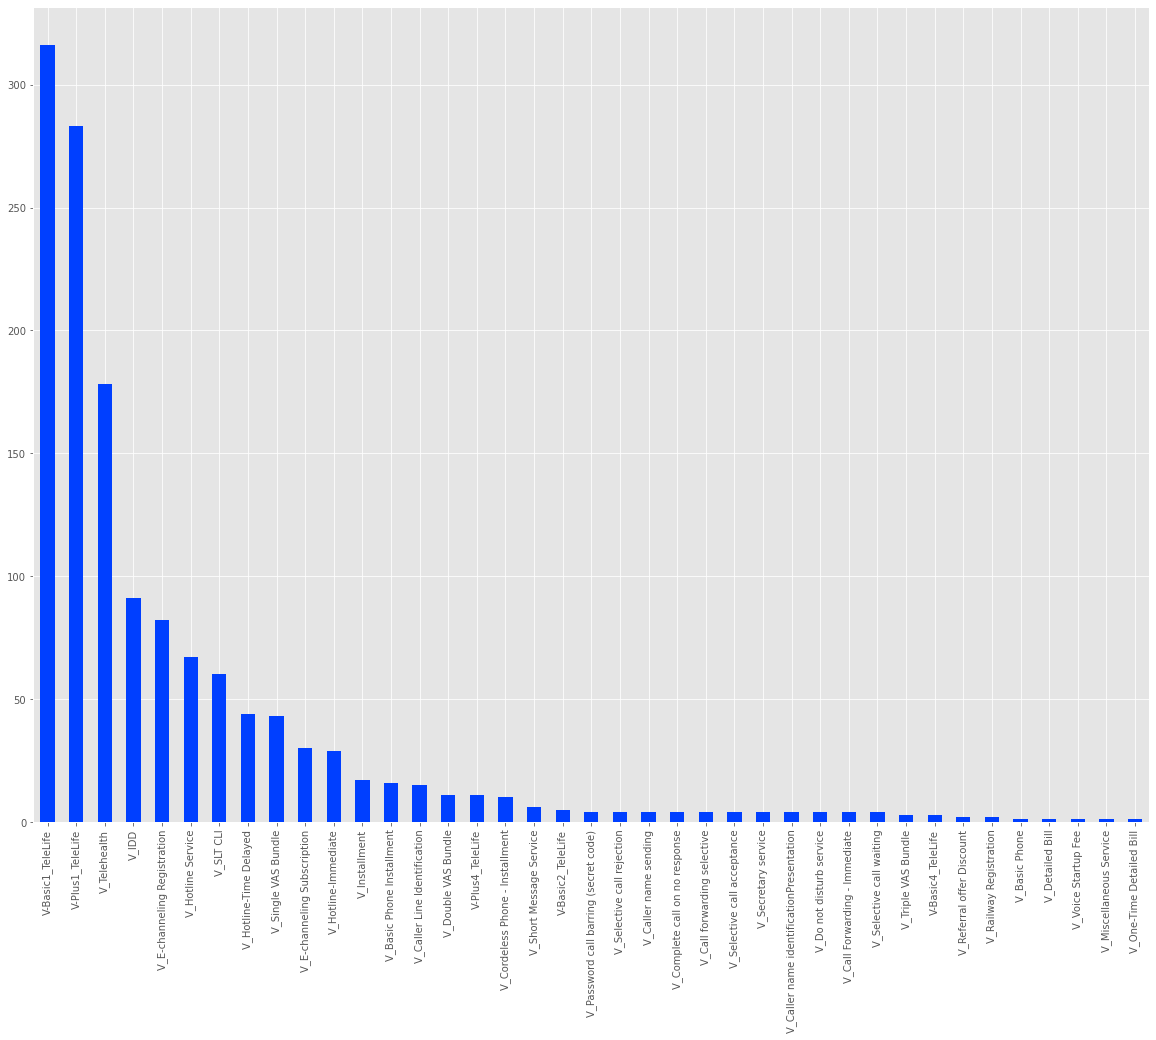

In [116]:
vas_final_df[(vas_final_df["VAS_Type"]=="Voice")]["VAS"].value_counts()[1:].plot(kind="bar", figsize=(20,15))

<AxesSubplot:>

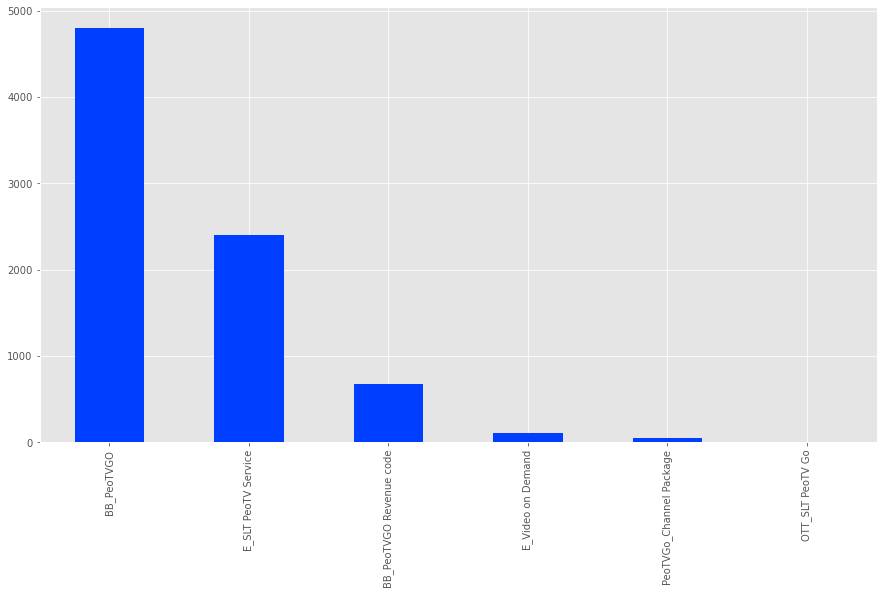

In [117]:
vas_final_df[(vas_final_df["VAS_Type"]=="PeoTV")]["VAS"].value_counts()[1:].plot(kind="bar", figsize=(15,8))

<AxesSubplot:>

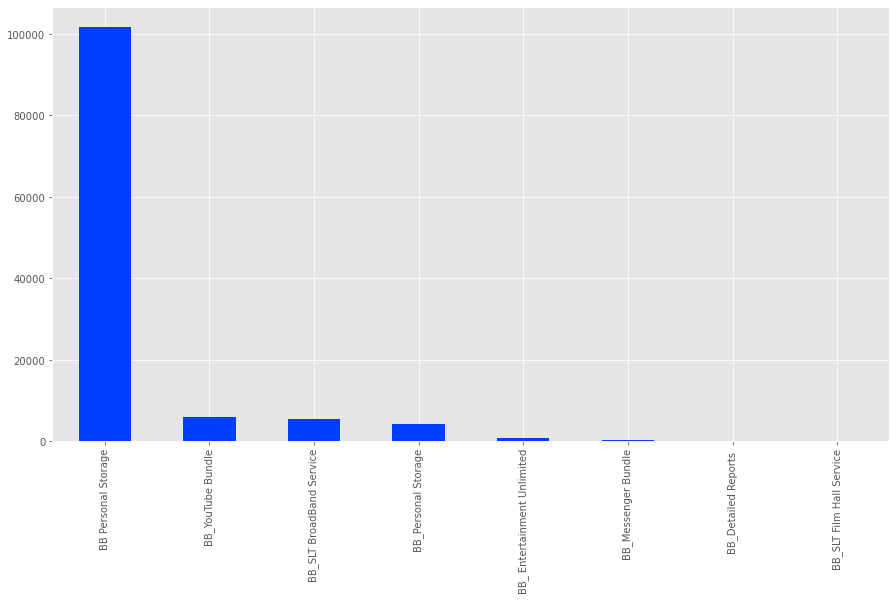

In [118]:
vas_final_df[(vas_final_df["VAS_Type"]=="BB")]["VAS"].value_counts()[1:].plot(kind="bar", figsize=(15,8))

<AxesSubplot:>

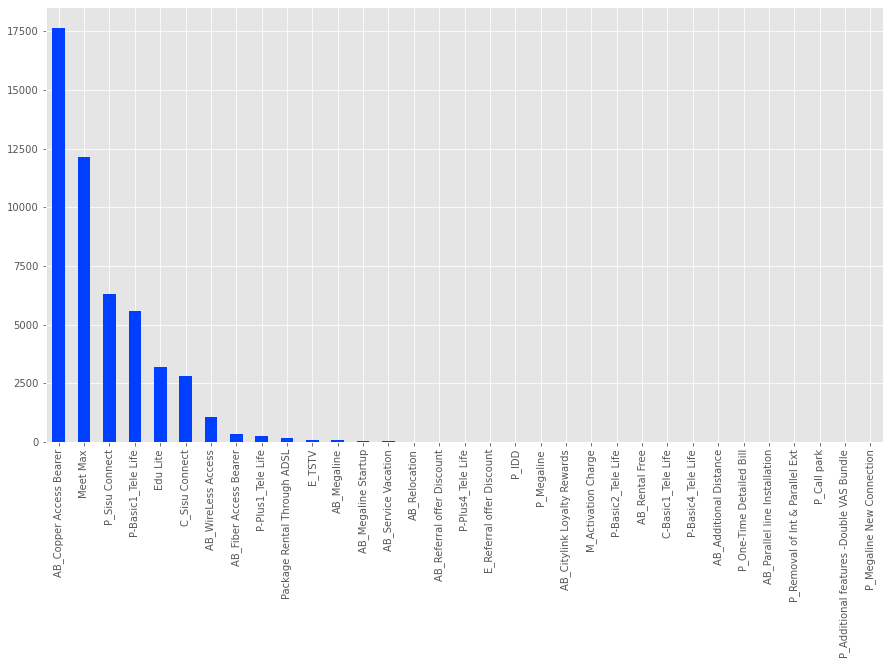

In [119]:
vas_final_df[(vas_final_df["VAS_Type"]=="Other")]["VAS"].value_counts()[1:].plot(kind="bar", figsize=(15,8))

## PeoTV Extra Channel Purchase Analysis

In [172]:
vas_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119046 entries, 4 to 599917
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   event_source.hash  119046 non-null  object 
 1   ACCOUNT_NUM.hash   119046 non-null  object 
 2   CUSTOMER_REF.hash  119046 non-null  object 
 3   VAS                119046 non-null  object 
 4   Month_Subscribed   119046 non-null  object 
 5   Rental             119046 non-null  object 
 6   One_Time_Charge    119046 non-null  float64
 7   VAS_Type           119046 non-null  object 
dtypes: float64(1), object(7)
memory usage: 8.2+ MB


In [171]:
vas_final_df[(vas_final_df["VAS_Type"] == "PeoTV")]["VAS"].unique()

array(['BB_PeoTVGO', 'E_SLT PeoTV Service', 'OTT_SLT PeoTV Go',
       'E_Video on Demand', 'PEO TV GO_OTT_A-la carte channels',
       'BB_PeoTVGO Revenue code', 'PeoTVGo_Channel Package'], dtype=object)

In [179]:
extra_Peo_df= vas_final_df[(vas_final_df["VAS"]=="PEO TV GO_OTT_A-la carte channels")]
extra_Peo_df.reset_index(inplace=True)
extra_Peo_df.drop(["index"],axis=1,inplace=True)

/home/chiran/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [180]:
extra_Peo_df= extra_Peo_df[["event_source.hash","ACCOUNT_NUM.hash","CUSTOMER_REF.hash","VAS","Month_Subscribed","Rental"]]

In [181]:
extra_Peo_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,VAS,Month_Subscribed,Rental
0,4a475b16493e3774d09eaf35ff514b97,90a7ca76033cf7fc3c3cb906f45c401c,df87723b07904aa3d7d31f5db24a4ec5,PEO TV GO_OTT_A-la carte channels,2019-07,100
1,6855c205e233785169e583bb50f9df0d,d0bd2c4614c24ce48b7fc09ff42eb002,b860f131ec0487bb52762524e4e8d38f,PEO TV GO_OTT_A-la carte channels,2019-08,100
2,9ade52133c7343e3f9a366c4c3e22bd8,6184e258fc549e12c235a2bc10ae297e,e87131d1793ae521c155b1a8ef40772d,PEO TV GO_OTT_A-la carte channels,2019-09,100
3,104dced91aa603c85945df73e2178d36,6184e258fc549e12c235a2bc10ae297e,e87131d1793ae521c155b1a8ef40772d,PEO TV GO_OTT_A-la carte channels,2019-09,100
4,ae3f41b44a487097f2ca7e711897e866,2e0841c32915addc312ba3b08314593e,7feaa76fc16a36615f6c731844564230,PEO TV GO_OTT_A-la carte channels,2019-10,100
...,...,...,...,...,...,...
1939,a046e63c7b39272c6d7af975a1e6772d,daa74e4f9afbb374acc64969fe778808,dffc1c556d835833616d2e57b50ed4b2,PEO TV GO_OTT_A-la carte channels,2020-08,100
1940,a2d5562b3cf68b7b58c4e41f76d8c913,daa74e4f9afbb374acc64969fe778808,dffc1c556d835833616d2e57b50ed4b2,PEO TV GO_OTT_A-la carte channels,2020-08,100
1941,140ba2d97ebac8759b150e6c8b6b1ea1,daa74e4f9afbb374acc64969fe778808,dffc1c556d835833616d2e57b50ed4b2,PEO TV GO_OTT_A-la carte channels,2020-08,100
1942,6feddfddbf00d72a5d55d64c668fedc1,daa74e4f9afbb374acc64969fe778808,dffc1c556d835833616d2e57b50ed4b2,PEO TV GO_OTT_A-la carte channels,2020-08,100


In [182]:
extra_Peo_df["Month_Subscribed"].unique()

array(['2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-06', '2020-08'], dtype=object)

In [183]:
len(extra_Peo_df["event_source.hash"].unique())

1944

#### Extra GB Usage pivot matrix

In [184]:
extra_Peo_pivot_df = pd.pivot_table(extra_Peo_df[["event_source.hash","Month_Subscribed","Rental"]],index=['event_source.hash'],columns=['Month_Subscribed'], aggfunc=np.sum, fill_value=0)

In [185]:
extra_Peo_pivot_df

Rental                                  \
Month_Subscribed                 2019-07 2019-08 2019-09 2019-10 2019-11   
event_source.hash                                                          
0014bcaff40182200be0e062cf9051cd       0       0       0       0       0   
0020f63be24f2eae231f5530ef3cf0d2       0       0       0       0       0   
003de40503f12be04b110634ef7cdb61       0       0       0       0       0   
005de991f47be96f65b894564c00ed14       0       0       0       0       0   
00802d4fd104229876956f33cc994aa4       0       0       0       0       0   
...                                  ...     ...     ...     ...     ...   
ff8a4db1e6b4e55b5248badbcd71a772       0       0       0       0       0   
ff8f6ab5f339819b046514630a89b4d9       0       0       0       0       0   
ff96fe17e185cd4c05bec76f14fa8672       0       0       0       0       0   
ffc01f977549ca288434079c9ca424ad       0       0       0       0       0   
ffff41a457d4ad9618d788bdd917e4ce       0       0       0       0       0   

                                                          
Month_Subscribed                 2019-12 2020-06 2020-08  
event_source.hash                                         
0014bcaff40182200be0e062cf9051cd       0       0     100  
0020f63be24f2eae231f5530ef3cf0d2       0       0     100  
003de40503f12be04b110634ef7cdb61       0       0     100  
005de991f47be96f65b894564c00ed14       0       0     100  
00802d4fd104229876956f33cc994aa4       0       0     100  
...                                  ...     ...     ...  
ff8a4db1e6b4e55b5248badbcd71a772       0       0     100  
ff8f6ab5f339819b046514630a89b4d9       0       0     100  
ff96fe17e185cd4c05bec76f14fa8672       0       0     100  
ffc01f977549ca288434079c9ca424ad       0       0     100  
ffff41a457d4ad9618d788bdd917e4ce       0       0     100  

[1944 rows x 8 columns]

In [186]:
extra_Peo_pivot_df.to_csv("data/user_profile/BB_extra_Peo_usage_pivot_extended.csv")

#### Insights
- 1955 Unique customers - extra Channel purchases in moths vary from 2019-07 to 2020-08
- No all monthly purchase information
- Users have interacted only once. Therfore not possible to extract a rating

## Exporting VAS names list

In [120]:
vas_list = vas_final_df['VAS'].unique()
vas_list_df = pd.DataFrame({"VAS":vas_list })
vas_list_df

,VAS
0,P-Basic1_Tele Life
1,V-Plus4_TeleLife
2,V-Plus1_TeleLife
3,V-Basic1_TeleLife
4,V_Telehealth
...,...
123,AB_Parallel line Installation
124,Meet Lite
125,Meet Max
126,Edu Lite


In [121]:
vas_list_df.to_csv("data/product_catalog/VAS_Names_Only_List.csv")

## Exporting Vas info Dataset

In [122]:
vas_info_df = vas_final_df[["VAS","Rental","One_Time_Charge","VAS_Type"]].drop_duplicates(["VAS"],keep="last")

In [123]:
vas_info_df.reset_index(inplace=True)

In [124]:
vas_info_df.drop(["index"],axis=1, inplace=True)

In [125]:
vas_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAS              128 non-null    object 
 1   Rental           25 non-null     object 
 2   One_Time_Charge  3 non-null      float64
 3   VAS_Type         128 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.1+ KB


In [126]:
vas_info_df.to_csv("data/product_catalog/VAS_Products_Info.csv")

## Exporting VAS aggregated DataFrame

In [127]:
vas_final_df.drop_duplicates(["event_source.hash","VAS"],inplace=True,keep="last")

In [128]:
vas_final_df.isnull().sum(axis=0)

event_source.hash         0
ACCOUNT_NUM.hash          0
CUSTOMER_REF.hash         0
VAS                       0
Month_Subscribed          0
Rental                68250
One_Time_Charge      100675
VAS_Type                  0
dtype: int64

In [129]:
vas_final_df.fillna(0,inplace=True)

### Voice VAS Aggregation

In [130]:
voice_agg_df = vas_final_df[(vas_final_df["VAS_Type"]=="Voice")]
voice_agg_df["VAS_Count"] = 1

<ipython-input-130-5bd44c520773>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voice_agg_df["VAS_Count"] = 1


In [131]:
voice_agg_df = voice_agg_df.groupby('event_source.hash', as_index=False).agg(list)

In [133]:
len(voice_agg_df["event_source.hash"].unique())

4020

In [134]:
voice_agg_df["ACCOUNT_NUM.hash"]= voice_agg_df["ACCOUNT_NUM.hash"].apply(lambda x: x[0])
voice_agg_df["CUSTOMER_REF.hash"]= voice_agg_df["CUSTOMER_REF.hash"].apply(lambda x: x[0])
voice_agg_df.drop(["VAS_Type"],axis=1,inplace=True)
voice_agg_df.rename(columns={"VAS":"Voice_VAS_Package","Month_Subscribed":"Voice_VAS_Month_Subscribed","Rental":"Voice_VAS_Rental","One_Time_Charge":"Voice_VAS_One_Time_Charge"},inplace=True)
voice_agg_df['VAS_Count'] = voice_agg_df.apply(lambda x: len(x['VAS_Count']), axis=1)

In [135]:
voice_agg_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,Voice_VAS_Package,Voice_VAS_Month_Subscribed,Voice_VAS_Rental,Voice_VAS_One_Time_Charge,VAS_Count
0,00099ff6e175f2b49e7067b20d69e4c3,6b4bfa1e32f513071c6b138a86c3bac9,0552174bba6950523aa45450f6690d02,[V_Sisu Connect],[2018-08],[30],[0.0],1
1,00171279c5c3c6731802925d8409245e,76d9ebdabc9289f652367e82f2371dc8,7ea6989a212eb0a84f9d551b98d73dbb,"[V-Basic1_TeleLife, V_E-channeling Subscription]","[2018-08, 2019-01]","[60, 0]","[0.0, 0.0]",2
2,002263311c9590ff1f95cac37b673672,d5b3f685fee264650b3de22f2bef0023,5dba81403ff06d5af8d260930300462e,[V_Sisu Connect],[2018-08],[30],[0.0],1
3,00233a32d63e50b6925ef83a9c8aa390,01f29baefa8fabbd7351cc8260f56323,bb9f9455c1930ff40863113204a38010,[V_Sisu Connect],[2018-08],[30],[0.0],1
4,002fb47f60400713c854b0f69ff78c0a,86562710d6118c9ff1c0426d6d6d4fe4,afbd804ec207ff59a84a59c03152550b,[V_E-channeling Registration],[2018-08],[0],[0.0],1
...,...,...,...,...,...,...,...,...
4015,ffb9cb2e838925de5a75764fd59c6ea1,141bb772e7009065289946c12f7f3e3a,820e5edf9a704ae11fb65e019c89c0ef,"[V_IDD, V_SLT CLI]","[2020-01, 2020-01]","[0, 0]","[0.0, 0.0]",2
4016,ffc22c155acb20eb0d920e418c0bf3ac,cc88c49f580c13600e99dfd9920d05e9,ac995f79a7164b89de084396352b343b,[V_Sisu Connect],[2014-06],[30],[0.0],1
4017,ffdc02dcce33f1448252d36624036703,01f29baefa8fabbd7351cc8260f56323,bb9f9455c1930ff40863113204a38010,[V_Sisu Connect],[2018-08],[30],[0.0],1
4018,ffea7843d6d18363551948c6553ca77a,16ba7704ef69803d3d41ebde44ad1c06,f7f58f60160d44ff1205c52c8676999f,[V_Sisu Connect],[2018-08],[30],[0.0],1


In [136]:
voice_agg_df.to_csv("data/user_profile/VAS_Voice_Aggregated.csv")

### BB VAS Aggregation

In [137]:
bb_agg_df = vas_final_df[(vas_final_df["VAS_Type"]=="BB")]
bb_agg_df["VAS_Count"] = 1

<ipython-input-137-9f0bd0903247>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_agg_df["VAS_Count"] = 1


In [138]:
bb_agg_df = bb_agg_df.groupby('event_source.hash', as_index=False).agg(list)

In [139]:
bb_agg_df["ACCOUNT_NUM.hash"]= bb_agg_df["ACCOUNT_NUM.hash"].apply(lambda x: x[0])
bb_agg_df["CUSTOMER_REF.hash"]= bb_agg_df["CUSTOMER_REF.hash"].apply(lambda x: x[0])
bb_agg_df.drop(["VAS_Type"],axis=1,inplace=True)
bb_agg_df.rename(columns={"VAS":"BB_VAS_Package","Month_Subscribed":"BB_VAS_Month_Subscribed","Rental":"BB_VAS_Rental","One_Time_Charge":"BB_VAS_One_Time_Charge"},inplace=True)
bb_agg_df['VAS_Count'] = bb_agg_df.apply(lambda x: len(x['VAS_Count']), axis=1)

In [140]:
bb_agg_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,BB_VAS_Package,BB_VAS_Month_Subscribed,BB_VAS_Rental,BB_VAS_One_Time_Charge,VAS_Count
0,000f86cd741d4e51303065b5f868e5ab,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f,"[BB_Report Subscription Charge, BB_YouTube Bun...","[2021-03, 2021-05, 2021-21]","[40.0, 155, 16.07]","[0.0, 0.0, 0.0]",3
1,00114ae408aa3b489b3f5d9baf7eb7ac,dd5253ea4772b427cc0e87ff6535b058,bdfc0b71edc02a021536f91cff85f00a,"[BB_Report Subscription Charge, BB Personal St...","[2021-03, 2021-06]","[40.0, 50.0]","[0.0, 0.0]",2
2,0017f09b5ff65c692de63b95d1edee27,0e1fe0d01f3a2e9619999a1a634ec427,cd3b840fb0da1abcc5bfdebaca6cd761,"[BB_Report Subscription Charge, BB_YouTube Bun...","[2021-03, 2021-04, 2021-21]","[40.0, 155, 14.29]","[0.0, 0.0, 0.0]",3
3,00225f30e3f5a4ac69240126f024755f,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f,"[BB_Personal Storage, BB_SLT BroadBand Service...","[2018-09, 2018-09, 2021-03, 2021-05, 2021-21]","[0, 8890.0, 40.0, 155, 16.07]","[0.0, 0.0, 0.0, 0.0, 0.0]",5
4,00233a32d63e50b6925ef83a9c8aa390,01f29baefa8fabbd7351cc8260f56323,bb9f9455c1930ff40863113204a38010,[BB Personal Storage],[2021-21],[14.29],[0.0],1
...,...,...,...,...,...,...,...,...
15455,fffb5e3c6693a35fbab056cb7bb374e8,af66a61a98c385584e3fccfd8dcc5412,1eca97f3ce8ee40e866677fdccc1d60e,"[BB_SLT BroadBand Service, BB_Report Subscript...","[2019-04, 2021-03, 2021-06]","[1490.0, 40.0, 50.0]","[0.0, 0.0, 0.0]",3
15456,fffbdf8e718726a5dac393d2014a83cc,949e14e85d36002ffb954d42d3366936,51ee71e46ba64034adaf383345028fb8,"[BB_Report Subscription Charge, BB_Messenger B...","[2021-03, 2021-05, 2021-05]","[40.0, 45, 155]","[0.0, 0.0, 0.0]",3
15457,fffc787f7b89f0a9401de0dbe3ab2206,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f,"[BB_Report Subscription Charge, BB_YouTube Bun...","[2021-03, 2021-05, 2021-21]","[40.0, 155, 14.29]","[0.0, 0.0, 0.0]",3
15458,ffff0039c1e0c380c4b890e6997d33c5,0e1fe0d01f3a2e9619999a1a634ec427,cd3b840fb0da1abcc5bfdebaca6cd761,"[BB_Report Subscription Charge, BB_YouTube Bun...","[2021-03, 2021-04, 2021-21]","[40.0, 155, 14.29]","[0.0, 0.0, 0.0]",3


In [141]:
len(bb_agg_df["event_source.hash"].unique())

15460

In [142]:
bb_agg_df.to_csv("data/user_profile/VAS_BB_Aggregated.csv")

### Peo VAS Aggregation

In [143]:
peo_agg_df = vas_final_df[(vas_final_df["VAS_Type"]=="PeoTV")]
peo_agg_df["VAS_Count"] = 1

<ipython-input-143-dded03e3155d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peo_agg_df["VAS_Count"] = 1


In [144]:
peo_agg_df = peo_agg_df.groupby('event_source.hash', as_index=False).agg(list)

In [145]:
peo_agg_df["ACCOUNT_NUM.hash"]= peo_agg_df["ACCOUNT_NUM.hash"].apply(lambda x: x[0])
peo_agg_df["CUSTOMER_REF.hash"]= peo_agg_df["CUSTOMER_REF.hash"].apply(lambda x: x[0])
peo_agg_df.drop(["VAS_Type"],axis=1,inplace=True)
peo_agg_df.rename(columns={"VAS":"Peo_VAS_Package","Month_Subscribed":"Peo_VAS_Month_Subscribed","Rental":"Peo_VAS_Rental","One_Time_Charge":"Peo_VAS_One_Time_Charge"},inplace=True)
peo_agg_df['VAS_Count'] = peo_agg_df.apply(lambda x: len(x['VAS_Count']), axis=1)

In [146]:
peo_agg_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,Peo_VAS_Package,Peo_VAS_Month_Subscribed,Peo_VAS_Rental,Peo_VAS_One_Time_Charge,VAS_Count
0,00099ff6e175f2b49e7067b20d69e4c3,6b4bfa1e32f513071c6b138a86c3bac9,0552174bba6950523aa45450f6690d02,[E_SLT PeoTV Service],[2018-08],[899.0],[0.0],1
1,0014bcaff40182200be0e062cf9051cd,2c98d4759ee2eca3f2d966be8739c1fa,9ef419bc0053418c6d847a3777cc0233,[PEO TV GO_OTT_A-la carte channels],[2020-08],[100],[0.0],1
2,0020f63be24f2eae231f5530ef3cf0d2,2c98d4759ee2eca3f2d966be8739c1fa,9ef419bc0053418c6d847a3777cc0233,"[E_SLT PeoTV Service, PEO TV GO_OTT_A-la carte...","[2018-08, 2020-08]","[1499.0, 100]","[0.0, 0.0]",2
3,00225f30e3f5a4ac69240126f024755f,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f,[BB_PeoTVGO],[2018-12],[0],[0.0],1
4,003796c503ba503e92b152acca7aa9e1,cc88c49f580c13600e99dfd9920d05e9,ac995f79a7164b89de084396352b343b,[BB_PeoTVGO],[2018-07],[0],[0.0],1
...,...,...,...,...,...,...,...,...
9426,ffce529136ebc87bd205993d2509c0ce,a1e2b9c2faf456eece4bb507dd044fcd,ae041952f243955016cb60d82413a8bf,[BB_PeoTVGO Revenue code],[2020-04],[249],[0.0],1
9427,ffea7843d6d18363551948c6553ca77a,16ba7704ef69803d3d41ebde44ad1c06,f7f58f60160d44ff1205c52c8676999f,[BB_PeoTVGO],[2019-10],[0],[0.0],1
9428,fffb5e3c6693a35fbab056cb7bb374e8,af66a61a98c385584e3fccfd8dcc5412,1eca97f3ce8ee40e866677fdccc1d60e,[BB_PeoTVGO],[2019-10],[0],[0.0],1
9429,ffff0039c1e0c380c4b890e6997d33c5,0e1fe0d01f3a2e9619999a1a634ec427,cd3b840fb0da1abcc5bfdebaca6cd761,[E_SLT PeoTV Service],[2020-02],[899.0],[0.0],1


In [147]:
len(peo_agg_df["event_source.hash"].unique())

9431

In [148]:
peo_agg_df.to_csv("data/user_profile/VAS_Peo_Aggregated.csv")

### Uncategorized VAS Aggregation

In [149]:
other_agg_df = vas_final_df[(vas_final_df["VAS_Type"]=="Other")]
other_agg_df["VAS_Count"] = 1

<ipython-input-149-cfa885fd22f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_agg_df["VAS_Count"] = 1


In [150]:
other_agg_df = other_agg_df.groupby('event_source.hash', as_index=False).agg(list)

In [151]:
other_agg_df["ACCOUNT_NUM.hash"]= other_agg_df["ACCOUNT_NUM.hash"].apply(lambda x: x[0])
other_agg_df["CUSTOMER_REF.hash"]= other_agg_df["CUSTOMER_REF.hash"].apply(lambda x: x[0])
other_agg_df.drop(["VAS_Type"],axis=1,inplace=True)
other_agg_df.rename(columns={"VAS":"Other_VAS_Package","Month_Subscribed":"Other_VAS_Month_Subscribed","Rental":"Other_VAS_Rental","One_Time_Charge":"Other_VAS_One_Time_Charge"},inplace=True)
other_agg_df['VAS_Count'] = other_agg_df.apply(lambda x: len(x['VAS_Count']), axis=1)

In [152]:
other_agg_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,Other_VAS_Package,Other_VAS_Month_Subscribed,Other_VAS_Rental,Other_VAS_One_Time_Charge,VAS_Count
0,00099ff6e175f2b49e7067b20d69e4c3,6b4bfa1e32f513071c6b138a86c3bac9,0552174bba6950523aa45450f6690d02,"[P_Sisu Connect, AB_Copper Access Bearer]","[2017-02, 2018-08]","[30, 0]","[0.0, 0.0]",2
1,000f86cd741d4e51303065b5f868e5ab,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f,"[P-Basic1_Tele Life, C_Sisu Connect, AB_WireLe...","[2012-06, 2016-11, 2020-05, 2021-02, 2021-03, ...","[60, 30, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 195.0, 195.0, 490.0]",6
2,00114ae408aa3b489b3f5d9baf7eb7ac,dd5253ea4772b427cc0e87ff6535b058,bdfc0b71edc02a021536f91cff85f00a,[AB_Copper Access Bearer],[2018-08],[0],[0.0],1
3,0014bcaff40182200be0e062cf9051cd,2c98d4759ee2eca3f2d966be8739c1fa,9ef419bc0053418c6d847a3777cc0233,[AB_Copper Access Bearer],[2018-08],[0],[0.0],1
4,00169293c66899b05ad10054c5f9a9c4,f22295dcdeb9502825e7d6140bbf8542,d4529a42fb85d23b1589bf04a1b637d6,[AB_Copper Access Bearer],[2018-11],[0],[0.0],1
...,...,...,...,...,...,...,...,...
23464,fffbdf8e718726a5dac393d2014a83cc,949e14e85d36002ffb954d42d3366936,51ee71e46ba64034adaf383345028fb8,"[AB_Copper Access Bearer, P_Sisu Connect, Edu ...","[2018-08, 2018-08, 2021-05, 2021-06]","[0, 30, 0, 0]","[0.0, 0.0, 195.0, 195.0]",4
23465,fffc787f7b89f0a9401de0dbe3ab2206,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f,"[P-Basic1_Tele Life, C_Sisu Connect, AB_Copper...","[2012-06, 2016-11, 2018-09, 2021-02, 2021-03, ...","[60, 30, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 195.0, 195.0, 490.0]",6
23466,ffff0039c1e0c380c4b890e6997d33c5,0e1fe0d01f3a2e9619999a1a634ec427,cd3b840fb0da1abcc5bfdebaca6cd761,"[AB_Copper Access Bearer, Meet Lite]","[2019-11, 2021-06]","[0, 0]","[0.0, 195.0]",2
23467,ffff41a457d4ad9618d788bdd917e4ce,44224bc1e2e7101c90bbad70dbcc5a6c,f5d47ec8993b2e30d200ec5f1c3bae1b,"[AB_Copper Access Bearer, Meet Lite]","[2018-08, 2021-04]","[0, 0]","[0.0, 195.0]",2


In [153]:
len(other_agg_df["event_source.hash"].unique())

23469

In [154]:
other_agg_df.to_csv("data/user_profile/VAS_Other_Aggregated.csv")

### FREE VAS Aggregation

In [161]:
free_agg_df = vas_final_df[(vas_final_df["VAS_Type"]=="FREE")]
free_agg_df["VAS_Count"] = 1

<ipython-input-161-ea7246292e47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_agg_df["VAS_Count"] = 1


In [162]:
free_agg_df = free_agg_df.groupby('event_source.hash', as_index=False).agg(list)

In [163]:
free_agg_df["ACCOUNT_NUM.hash"]= free_agg_df["ACCOUNT_NUM.hash"].apply(lambda x: x[0])
free_agg_df["CUSTOMER_REF.hash"]= free_agg_df["CUSTOMER_REF.hash"].apply(lambda x: x[0])
free_agg_df.drop(["VAS_Type"],axis=1,inplace=True)
free_agg_df.rename(columns={"VAS":"FREE_VAS_Package","Month_Subscribed":"FREE_VAS_Month_Subscribed","Rental":"FREE_VAS_Rental","One_Time_Charge":"FREE_VAS_One_Time_Charge"},inplace=True)
free_agg_df['VAS_Count'] = free_agg_df.apply(lambda x: len(x['VAS_Count']), axis=1)

In [164]:
free_agg_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,FREE_VAS_Package,FREE_VAS_Month_Subscribed,FREE_VAS_Rental,FREE_VAS_One_Time_Charge,VAS_Count
0,00099ff6e175f2b49e7067b20d69e4c3,6b4bfa1e32f513071c6b138a86c3bac9,0552174bba6950523aa45450f6690d02,[V_SLT Voice Service],[2018-08],[0],[0.0],1
1,00114ae408aa3b489b3f5d9baf7eb7ac,dd5253ea4772b427cc0e87ff6535b058,bdfc0b71edc02a021536f91cff85f00a,[V_SLT Voice Service],[2018-08],[0],[0.0],1
2,0014bcaff40182200be0e062cf9051cd,2c98d4759ee2eca3f2d966be8739c1fa,9ef419bc0053418c6d847a3777cc0233,[V_SLT Voice Service],[2018-08],[0],[0.0],1
3,00169293c66899b05ad10054c5f9a9c4,f22295dcdeb9502825e7d6140bbf8542,d4529a42fb85d23b1589bf04a1b637d6,[V_SLT Voice Service],[2018-11],[0],[0.0],1
4,0017f09b5ff65c692de63b95d1edee27,0e1fe0d01f3a2e9619999a1a634ec427,cd3b840fb0da1abcc5bfdebaca6cd761,[V_SLT Voice Service],[2018-08],[0],[0.0],1
...,...,...,...,...,...,...,...,...
18909,fffbdf8e718726a5dac393d2014a83cc,949e14e85d36002ffb954d42d3366936,51ee71e46ba64034adaf383345028fb8,[V_SLT Voice Service],[2018-08],[0],[0.0],1
18910,fffc787f7b89f0a9401de0dbe3ab2206,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f,[V_SLT Voice Service],[2018-09],[0],[0.0],1
18911,ffff0039c1e0c380c4b890e6997d33c5,0e1fe0d01f3a2e9619999a1a634ec427,cd3b840fb0da1abcc5bfdebaca6cd761,[V_SLT Voice Service],[2019-11],[0],[0.0],1
18912,ffff41a457d4ad9618d788bdd917e4ce,44224bc1e2e7101c90bbad70dbcc5a6c,f5d47ec8993b2e30d200ec5f1c3bae1b,[V_SLT Voice Service],[2018-08],[0],[0.0],1


In [165]:
len(free_agg_df["event_source.hash"].unique())

18914

In [166]:
free_agg_df.to_csv("data/user_profile/VAS_FREE_Aggregated.csv")

## Subscription Promotion Upgrade Downgrade orders

In [722]:
promotion_df = pd.read_excel("data/new/Promotion_Upgrade_Dates.xls")  

In [723]:
promotion_df =promotion_df[["CUSTOMER_REF.hash","ACCOUNT_NUM.hash","MAX_DSP","ORDER_CONDITION","ADDING_PROMO","Deleting_PROMO","Updating_PROMO"]]

In [724]:
promotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CUSTOMER_REF.hash  1496 non-null   object
 1   ACCOUNT_NUM.hash   1496 non-null   object
 2   MAX_DSP            1495 non-null   object
 3   ORDER_CONDITION    1496 non-null   object
 4   ADDING_PROMO       1467 non-null   object
 5   Deleting_PROMO     1467 non-null   object
 6   Updating_PROMO     5 non-null      object
dtypes: object(7)
memory usage: 81.9+ KB


### Exporting customer - subscription dataset

In [725]:
sub_df = promotion_df[["CUSTOMER_REF.hash","ACCOUNT_NUM.hash","ADDING_PROMO"]]

In [726]:
sub_df.rename(columns={"ADDING_PROMO":"Subscription"}, inplace=True)

/home/chiran/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [727]:
sub_df["Subscription"].unique()

array(['SLT Megaline Double Play (PV) Package',
       'SLT Megaline Triple Play Package',
       'SLT Megaline Single Play Package',
       'SLT Megaline Double Play (BV) Package', nan,
       'SLT Smartline Triple Play', 'SLT LTE Double Play Package',
       'SLT LTE 4G Biz Pal Package', 'SLT Smartline Double Play (PV)',
       'SLT LTE 4G Net Pal Package', 'SLT LTE 4G Voice Pal Basic Package',
       'SLT Smartline Double Play (BV)'], dtype=object)

In [728]:
sub_df.isnull().sum(axis=0)

CUSTOMER_REF.hash     0
ACCOUNT_NUM.hash      0
Subscription         29
dtype: int64

In [729]:
sub_df.dropna(inplace=True)

<ipython-input-729-127880e692ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.dropna(inplace=True)


In [730]:
def sub_type(sub):
    if "Single Play" in sub:
        return "SINGLE_PLAY"
    if "Triple Play" in sub:
        return "TRIPLE_PLAY"
    if "Double Play (PV)" in sub:
        return "DOUBLE_PLAY_PV"
    if "Double Play (BV)" in sub or "LTE Double Play" in sub:
        return "DOUBLE_PLAY_BV"
    if "LTE 4G" in sub:
        return "4G"

In [731]:
sub_df["Sub_Type"] = sub_df["Subscription"].apply(lambda x: sub_type(x))

<ipython-input-731-96b5985bec8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["Sub_Type"] = sub_df["Subscription"].apply(lambda x: sub_type(x))


In [732]:
sub_df["Sub_Type"].value_counts()

TRIPLE_PLAY       491
DOUBLE_PLAY_PV    347
SINGLE_PLAY       323
DOUBLE_PLAY_BV    303
4G                  3
Name: Sub_Type, dtype: int64

In [733]:
# Mapping phone number
sub_df = sub_df.merge(acc_no_map,how='left',on=["ACCOUNT_NUM.hash","CUSTOMER_REF.hash"])

In [734]:
sub_df.drop_duplicates(["event_source.hash"],inplace=True)
sub_df.reset_index(inplace=True)
sub_df.drop(["index"],axis=1,inplace=True)
sub_df = sub_df[["event_source.hash","ACCOUNT_NUM.hash","CUSTOMER_REF.hash","Subscription","Sub_Type"]]
sub_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,Subscription,Sub_Type
0,0d3e013c9b350387311e17773bfc6e17,59322724d5029e5667d19ae164cdc16d,efeab37d377b0f32b7f70b159f824652,SLT Megaline Double Play (PV) Package,DOUBLE_PLAY_PV
1,56ad7e0c53f6cb5a35f056f58317d627,59322724d5029e5667d19ae164cdc16d,efeab37d377b0f32b7f70b159f824652,SLT Megaline Double Play (PV) Package,DOUBLE_PLAY_PV
2,0d13e2f0bd4ce0b3d28c1cea1319a109,59322724d5029e5667d19ae164cdc16d,efeab37d377b0f32b7f70b159f824652,SLT Megaline Double Play (PV) Package,DOUBLE_PLAY_PV
3,c04d14b1ae606541c9c6ae0e6b368086,59322724d5029e5667d19ae164cdc16d,efeab37d377b0f32b7f70b159f824652,SLT Megaline Double Play (PV) Package,DOUBLE_PLAY_PV
4,6290167ca39638c98f743122d90c75bb,59322724d5029e5667d19ae164cdc16d,efeab37d377b0f32b7f70b159f824652,SLT Megaline Double Play (PV) Package,DOUBLE_PLAY_PV
...,...,...,...,...,...
20281,7273147fecbe61d8d2a46d4c81ac28a6,7aa8c0a144b14c0d37d9b50e420c4773,ebd74330fc980cc9a5f9b06cd275eaca,SLT Megaline Triple Play Package,TRIPLE_PLAY
20282,e50847ef96deae5e77baf1c842536376,1b90f00af43142138b9b33bb1cbf00dd,5ef66392d4c836402c076f423060f390,SLT Megaline Single Play Package,SINGLE_PLAY
20283,4d745e7d1d13f7ae04bdf2fb6a20aecb,1b90f00af43142138b9b33bb1cbf00dd,5ef66392d4c836402c076f423060f390,SLT Megaline Single Play Package,SINGLE_PLAY
20284,0f26a3a983b6440f508d5561ba8ace95,1b90f00af43142138b9b33bb1cbf00dd,5ef66392d4c836402c076f423060f390,SLT Megaline Single Play Package,SINGLE_PLAY


In [735]:
sub_df.isnull().sum(axis=0)

event_source.hash    0
ACCOUNT_NUM.hash     0
CUSTOMER_REF.hash    0
Subscription         0
Sub_Type             0
dtype: int64

In [736]:
sub_df.to_csv("data/user_profile/User_Subscription_Map.csv")

## Subscription Upgrades and Downgrades

In [737]:
promo_change_df = promotion_df[["ACCOUNT_NUM.hash","MAX_DSP","ORDER_CONDITION","Deleting_PROMO","ADDING_PROMO"]].merge(acc_no_map,how='left',on=["ACCOUNT_NUM.hash"])

In [738]:
promo_change_df.drop_duplicates(["event_source.hash"],inplace=True)
promo_change_df.reset_index(inplace=True)
promo_change_df.drop(["index"],axis=1,inplace=True)
promo_change_df.rename(columns={"MAX_DSP":"Sub_Update_Date","ORDER_CONDITION":"Sub_Update_Status","Deleting_PROMO":"Sub_Removed","ADDING_PROMO":"Sub_Added"},inplace=True)

In [739]:
promo_change_df = promo_change_df[["event_source.hash","ACCOUNT_NUM.hash","CUSTOMER_REF.hash","Sub_Update_Date","Sub_Update_Status","Sub_Added","Sub_Removed"]]
promo_change_df

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,Sub_Update_Date,Sub_Update_Status,Sub_Added,Sub_Removed
0,0d3e013c9b350387311e17773bfc6e17,59322724d5029e5667d19ae164cdc16d,efeab37d377b0f32b7f70b159f824652,26/06/2020 15:24:00,Promotion Upgrade,SLT Megaline Double Play (PV) Package,SLT Megaline Single Play Package
1,56ad7e0c53f6cb5a35f056f58317d627,59322724d5029e5667d19ae164cdc16d,efeab37d377b0f32b7f70b159f824652,26/06/2020 15:24:00,Promotion Upgrade,SLT Megaline Double Play (PV) Package,SLT Megaline Single Play Package
2,0d13e2f0bd4ce0b3d28c1cea1319a109,59322724d5029e5667d19ae164cdc16d,efeab37d377b0f32b7f70b159f824652,26/06/2020 15:24:00,Promotion Upgrade,SLT Megaline Double Play (PV) Package,SLT Megaline Single Play Package
3,c04d14b1ae606541c9c6ae0e6b368086,59322724d5029e5667d19ae164cdc16d,efeab37d377b0f32b7f70b159f824652,26/06/2020 15:24:00,Promotion Upgrade,SLT Megaline Double Play (PV) Package,SLT Megaline Single Play Package
4,6290167ca39638c98f743122d90c75bb,59322724d5029e5667d19ae164cdc16d,efeab37d377b0f32b7f70b159f824652,26/06/2020 15:24:00,Promotion Upgrade,SLT Megaline Double Play (PV) Package,SLT Megaline Single Play Package
...,...,...,...,...,...,...,...
20304,7273147fecbe61d8d2a46d4c81ac28a6,7aa8c0a144b14c0d37d9b50e420c4773,ebd74330fc980cc9a5f9b06cd275eaca,05/02/2020 18:21:00,Promotion Upgrade,SLT Megaline Triple Play Package,SLT Megaline Single Play Package
20305,e50847ef96deae5e77baf1c842536376,1b90f00af43142138b9b33bb1cbf00dd,5ef66392d4c836402c076f423060f390,29/01/2020 12:34:00,Promotion Downgrade,SLT Megaline Single Play Package,SLT Megaline Double Play (BV) Package
20306,4d745e7d1d13f7ae04bdf2fb6a20aecb,1b90f00af43142138b9b33bb1cbf00dd,5ef66392d4c836402c076f423060f390,29/01/2020 12:34:00,Promotion Downgrade,SLT Megaline Single Play Package,SLT Megaline Double Play (BV) Package
20307,0f26a3a983b6440f508d5561ba8ace95,1b90f00af43142138b9b33bb1cbf00dd,5ef66392d4c836402c076f423060f390,29/01/2020 12:34:00,Promotion Downgrade,SLT Megaline Single Play Package,SLT Megaline Double Play (BV) Package


In [740]:
promo_change_df.isnull().sum(axis=0)

event_source.hash      0
ACCOUNT_NUM.hash       0
CUSTOMER_REF.hash      0
Sub_Update_Date        0
Sub_Update_Status      0
Sub_Added            403
Sub_Removed          403
dtype: int64

In [741]:
promo_change_df.dropna(inplace=True)

In [742]:
promo_change_df["Sub_Removed"] = promo_change_df["Sub_Removed"].apply(lambda x: sub_type(x))
promo_change_df["Sub_Added"] = promo_change_df["Sub_Added"].apply(lambda x: sub_type(x))

In [743]:
def sub_change_state(sub1,sub2):
    return f"{sub1} -> {sub2}"

In [744]:
promo_change_df["Sub_Update"] = promo_change_df.apply(lambda x: sub_change_state(x["Sub_Removed"],x["Sub_Added"]),axis=1)

In [745]:
promo_change_df[["Sub_Update_Status","Sub_Update"]].value_counts()

Sub_Update_Status    Sub_Update                      
Promotion Upgrade    SINGLE_PLAY -> DOUBLE_PLAY_BV       8571
                     SINGLE_PLAY -> DOUBLE_PLAY_PV       6521
Promotion Downgrade  DOUBLE_PLAY_BV -> SINGLE_PLAY       2052
Promotion Upgrade    DOUBLE_PLAY_PV -> TRIPLE_PLAY       1541
                     DOUBLE_PLAY_BV -> TRIPLE_PLAY        376
                     TRIPLE_PLAY -> DOUBLE_PLAY_BV        249
Promotion Downgrade  DOUBLE_PLAY_PV -> SINGLE_PLAY        197
                     TRIPLE_PLAY -> DOUBLE_PLAY_PV        111
Promotion Upgrade    4G -> 4G                             102
                     SINGLE_PLAY -> TRIPLE_PLAY            80
Promotion Downgrade  TRIPLE_PLAY -> SINGLE_PLAY            66
                     TRIPLE_PLAY -> DOUBLE_PLAY_BV         29
Promotion Upgrade    TRIPLE_PLAY -> DOUBLE_PLAY_PV          3
                     DOUBLE_PLAY_BV -> SINGLE_PLAY          2
                     DOUBLE_PLAY_PV -> DOUBLE_PLAY_BV       2
Promotion Downgr

In [746]:
promo_change_df.drop(promo_change_df.query("Sub_Update_Status == 'Promotion Upgrade' & Sub_Update == 'TRIPLE_PLAY -> DOUBLE_PLAY_BV'").index, inplace=True)

In [747]:
promo_change_df.drop(promo_change_df.query("Sub_Update_Status == 'Promotion Upgrade' & Sub_Update == 'TRIPLE_PLAY -> DOUBLE_PLAY_PV'").index, inplace=True)

In [748]:
promo_change_df.drop(promo_change_df.query("Sub_Update_Status == 'Promotion Downgrade' & Sub_Update == 'SINGLE_PLAY -> DOUBLE_PLAY_BV'").index, inplace=True)

In [749]:
promo_change_df.drop(promo_change_df.query("Sub_Update_Status == 'Promotion Downgrade' & Sub_Update == 'DOUBLE_PLAY_BV -> TRIPLE_PLAY'").index, inplace=True)

In [750]:
promo_change_df.drop(promo_change_df.query("Sub_Update_Status == 'Promotion Downgrade' & Sub_Update == 'DOUBLE_PLAY_PV -> TRIPLE_PLAY'").index, inplace=True)

In [751]:
promo_change_df.drop(promo_change_df.query("Sub_Update_Status == 'Promotion Upgrade' & Sub_Update == 'DOUBLE_PLAY_BV -> SINGLE_PLAY'").index, inplace=True)

In [752]:
promo_change_df[["Sub_Update_Status","Sub_Update"]].value_counts()

Sub_Update_Status    Sub_Update                      
Promotion Upgrade    SINGLE_PLAY -> DOUBLE_PLAY_BV       8571
                     SINGLE_PLAY -> DOUBLE_PLAY_PV       6521
Promotion Downgrade  DOUBLE_PLAY_BV -> SINGLE_PLAY       2052
Promotion Upgrade    DOUBLE_PLAY_PV -> TRIPLE_PLAY       1541
                     DOUBLE_PLAY_BV -> TRIPLE_PLAY        376
Promotion Downgrade  DOUBLE_PLAY_PV -> SINGLE_PLAY        197
                     TRIPLE_PLAY -> DOUBLE_PLAY_PV        111
Promotion Upgrade    4G -> 4G                             102
                     SINGLE_PLAY -> TRIPLE_PLAY            80
Promotion Downgrade  TRIPLE_PLAY -> SINGLE_PLAY            66
                     TRIPLE_PLAY -> DOUBLE_PLAY_BV         29
Promotion Upgrade    DOUBLE_PLAY_PV -> DOUBLE_PLAY_BV       2
dtype: int64

In [753]:
promo_change_df.drop(["Sub_Added","Sub_Removed"],axis=1,inplace=True)

In [754]:
promo_change_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19648 entries, 0 to 20308
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  19648 non-null  object
 1   ACCOUNT_NUM.hash   19648 non-null  object
 2   CUSTOMER_REF.hash  19648 non-null  object
 3   Sub_Update_Date    19648 non-null  object
 4   Sub_Update_Status  19648 non-null  object
 5   Sub_Update         19648 non-null  object
dtypes: object(6)
memory usage: 1.0+ MB


In [755]:
promo_change_df.to_csv("data/user_profile/User_Subscription_Changes.csv")